
# Topic: Toxic comments classifier using deep learning

## Overview:

Built four different classifiers for identifying different levels of toxicity among the comments from our dataset (Source : Wikipedia review comment).

Among the four classifiers which I built (Bi-Directional LSTM model, Doc2Vec Logistic Regression, Tf-IDF Logistic Regression and TF-IDF Naive Bayes), the Bi-Directional LSTM model performed the best with the highest average F-1 score across different test datasets.

**The reason I have built a separate classifier for each class (toxic, severe_toxic, obscene, threat, insult, identity_hate) is that we can compare the results much more efficiently and with much more clarity for each class for the four different models that we have used.**

**Code guideline**: To run the code. You will need to follow the code and run the program as it is. To load the loaded model, you can use the respective model names for each class ('toxic.hd5','severe_toxic.hd5','obscene.hd5','threat.hd5','insult.hd5','identity_hate.hd5'). To load the model, use model= load_model(*model name*) 

**NOTE : It took upto 50 minutes for each deep learning model to train on our PC (16 GB RAM , i-7 Core)**




## Code Index:


### 1. Data reading and cleaning

    1.1 Importing essential libraries
    1.2 Null cleaning function
    1.3 Reading data and aplying null cleaning function
    1.4 Cleaning all non-alphanumeric characters
    1.5 Converting to lowercase and removing punctuations
    1.6 Cleaned output

#### Experiments

### 2. Deep learning using Bi-Directional LSTM( Long Short Term Memory)

    2.1 Importing all the keras libraries
    2.2 Splitting into training and test data
    2.3 Tokenizer function of keras
    2.4 Vectorization
    2.5 Converting all the output labels into appropriate categorical form for model training
    2.6 Building the neural network
    2.7 Training the model with 30 epochs of the training data
    2.8 Saving and loading the model
        2.8.1 'Toxic' category classification
            2.8.1.1 Test set results
            2.8.1.2 Checking the classification metrics of the model
        2.8.2 'Severely Toxic' category classification
            2.8.1.1 Test set results
            2.8.1.2 Checking the classification metrics of the model
        2.8.3 'Obscene' category classification
            2.8.1.1 Test set results
            2.8.1.2 Checking the classification metrics of the model
        2.8.4 'Threat' category classification
            2.8.1.1 Test set results
            2.8.1.2 Checking the classification metrics of the model
        2.8.5 'Insult' category classification
            2.8.1.1 Test set results
            2.8.1.2 Checking the classification metrics of the model
        2.8.6 'Hate' category classification
            2.8.1.1 Test set results
            2.8.1.2 Checking the classification metrics of the model
        
        
### 3. Machine learning approach

    3.1 Importing Machine learning classifiers from scikit learn
    3.2 Lemmatization class using nltk
    3.3 Importing the Vectorization libraries
    3.4 Fitting the training data on TfIdfVectorizer
    3.5 Vectorizing the test and train data
    3.6 Results on different classifiers using Naive bayes and Logistic Regression
        3.6.1 Logistic regression
            3.6.1.1 'Toxic' category classification and results
            3.6.1.2 'Severe Toxic' category classification and results
            3.6.1.3 'Obscene' category classification and results
            3.6.1.4 'Threat' category classification and results
            3.6.1.5 'Insult' category classification and results
            3.6.1.6 'Hate' category classification and results
         3.6.2 Naive Bayes
            3.6.2.1 'Toxic' category classification and results
            3.6.2.2 'Severe Toxic' category classification and results
            3.6.2.3 'Obscene' category classification and results
            3.6.2.4 'Threat' category classification and results
            3.6.2.5 'Insult' category classification and results
            3.6.2.6 'Hate' category classification and results

    
### 4. Custom dataset experiment (Twitter data)

    4.1 Bidirectional LSTM deep learning results
        4.1.1 'Toxic' category classifier
        4.1.2 'Severe toxic' category classifier
        4.1.3 'Obscene' category classifier
        4.1.4 'Threat' category classifier
        4.1.5 'Insult' category classifier
        4.1.6 'Hate' category classifier
    4.2 Logistic regression results
        4.2.1 'Toxic' category classifier
        4.2.2 'Severe toxic' category classifier
        4.2.3 'Obscene' category classifier
        4.2.4 'Threat' category classifier
        4.2.5 'Insult' category classifier
        4.2.6 'Hate' category classifier
    4.3 Naive Bayes results
        4.3.1 'Toxic' category classifier
        4.3.2 'Severe toxic' category classifier
        4.3.3 'Obscene' category classifier
        4.3.4 'Threat' category classifier
        4.3.5 'Insult' category classifier
        4.3.6 'Hate' category classifier

### 5. Doc2Vec for classification

    5.1 Importing essential libraries
    5.2 Converting into vectors using Doc2Vec
    5.3 Logistic regression test set results and metrics
  

### 6. Scattertext for identifying themes in classified comments

    6.1 Importing essential libraries
    6.2 Creating a corpus
    6.3 Rending the scattertext on a html page
  

# Code : 

## 1. Data reading and cleaning

### 1.1 Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
pd.set_option('display.max_colwidth', -1)

### 1.2 Null cleaning function

In [2]:
#Null cleaning function

def myfillna(series):
    if series.dtype is pd.np.dtype(float):
        return series.fillna('')
    elif series.dtype is pd.np.dtype(int):
        return series.fillna('')
    else:
        return series.fillna('NA')

### 1.3 Reading data and applying null cleaning function

In [3]:
#Reading data
data=pd.read_csv('C:/Users/I870648/Data/train.csv',encoding='latin-1')

In [4]:
data.shape

(159571, 8)

In [5]:
data=data.apply(myfillna)

In [6]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0


In [7]:
data.comment_text

0         Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

### 1.4 Cleaning all non-alphanumeric characters

In [7]:
data.comment_text=data.comment_text.str.replace('[^a-zA-Z]', ' ')

### 1.5 Converting to lowercase and removing punctuations

In [8]:

RE_PREPROCESS = r'\W+|\d+' #the regular expressions that matches all non-characters
data.comment_text = np.array( [ re.sub(RE_PREPROCESS, ' ', comment).lower() for comment in data.comment_text])

#### Cleaned data output

In [9]:
data.comment_text.head()

0    explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now                                                                                                                                                                                                                                                                                                                                                                   
1    d aww he matches this background colour i m seemingly stuck with thanks talk january utc                                                                                                                                                                                                                                                                                                          

In [10]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i m seemingly stuck with thanks talk january utc,0,0,0,0,0,0
2,000113f07ec002fd,hey man i m really not trying to edit war it s just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on improvement i wondered if the section statistics should be later on or a subsection of types of accidents i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if no one else does first if you have any preferences for formatting style on references or want to do it yourself please let me know there appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up it s listed in the relevant form eg wikipedia good article nominations transport,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember what page that s on,0,0,0,0,0,0


## 2. Deep learning using Bidirectional LSTM for prediction

### 2.1 Importing all the keras libraries

In [11]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Activation, Dense, Embedding, Bidirectional
from keras.layers import LSTM
from keras.datasets import imdb
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers import AveragePooling1D
from keras.layers import Conv1D
from keras.models import load_model
from keras.preprocessing.text import Tokenizer

C:\Users\I870648\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### 2.2 Splitting into training and test data

In [12]:
train_size = int(len(data) * .2)
train_posts = data['comment_text'][train_size:]
train_tags = data['toxic'][train_size:]
test_posts = data['comment_text'][:train_size]
test_tags = data['toxic'][:train_size]

### 2.3 Tokenizer function of keras
**Tokenizer will tokenize the sentences by fitting it on training set with maximum number of features of 3000 and preprocess it using Tf-idf (It will also remove stopwords)**

In [103]:
vocab_size = 3000
tokenize = Tokenizer(num_words=vocab_size)
tokenize.fit_on_texts(train_posts)

### 2.4 Vectorization 
**Convert the tokens into a matrix feature space (vectorized format)**

In [104]:
x_train = tokenize.texts_to_matrix(train_posts)

In [105]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_train.shape

(127657, 1, 3000)

### 2.5 Converting all the output labels into appropriate categorical form for model training

In [14]:
from sklearn.preprocessing import LabelBinarizer

In [15]:
train_tags.shape

(127657,)

In [16]:
train_tags=train_tags.astype(int)
test_tags=test_tags.astype(int)

In [19]:
#Converting the training labels to the binary format
encoder = LabelBinarizer()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

(127657, 1, 3000)

In [20]:
#Converting binary labels to categorical format for Keras model training
from keras.utils import to_categorical
y_train = to_categorical(y_train)

### 2.6 Building the neural network

In [115]:

data_dim = 3000
timesteps = 1
num_classes = 2

model = Sequential()
model.add(Bidirectional(LSTM(30, return_sequences=True,
               input_shape=(timesteps, data_dim))))  # returns a sequence of vectors of dimension 30
model.add(Conv1D(30, 1, activation='relu')) #Convolution Layer for filtering the vectors
model.add(Bidirectional(LSTM(30, return_sequences=True)))
model.add(Bidirectional(LSTM(30,recurrent_dropout=0.1)))  # return a single vector of dimension 30
model.add(Activation('relu')) #Adding a RELU activation unit
model.add(Dense(2, activation='softmax')) #Final softmax layer which will predict the output

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### 2.7 Training the model with 30 epochs of the training data

In [87]:
model.fit(x_train, y_train, batch_size = 200, epochs = 30, verbose = 1)

Epoch 1/30
127657/127657 [==============================] - 62s 486us/step - loss: 0.1846 - acc: 0.9404
Epoch 2/30
127657/127657 [==============================] - 55s 434us/step - loss: 0.1110 - acc: 0.9604
Epoch 3/30
127657/127657 [==============================] - 56s 438us/step - loss: 0.1005 - acc: 0.9634
Epoch 4/30
127657/127657 [==============================] - 55s 431us/step - loss: 0.0912 - acc: 0.9661
Epoch 5/30
127657/127657 [==============================] - 55s 429us/step - loss: 0.0812 - acc: 0.9695
Epoch 6/30
127657/127657 [==============================] - 55s 431us/step - loss: 0.0707 - acc: 0.9725
Epoch 7/30
127657/127657 [==============================] - 61s 477us/step - loss: 0.0611 - acc: 0.9760
Epoch 8/30
127657/127657 [==============================] - 67s 522us/step - loss: 0.0497 - acc: 0.9809
Epoch 9/30
127657/127657 [==============================] - 65s 506us/step - loss: 0.0407 - acc: 0.9848
Epoch 10/30
127657/127657 [==============================] - 58s

### 2.8 Saving and Loading the model

In [88]:
#Saving the model
model.save('toxic.hd5')

In [21]:
model=load_model('toxic.hd5')

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_5 (Bidirection (None, 1, 60)             727440    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 30)             1830      
_________________________________________________________________
bidirectional_6 (Bidirection (None, 1, 60)             14640     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 60)                21840     
_________________________________________________________________
activation_2 (Activation)    (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 122       
Total params: 765,872
Trainable params: 765,872
Non-trainable params: 0
_________________________________________________________________


### Note: All the classification of the 6 categories (Toxic, Severely toxic, Obscene, Threat, Insult, Hate) have been done by fitting in the model designed above.  Hence, same steps have been followed for each classifier mentioned below.

### 2.8.1 Toxic category classification

In [75]:
#Converting test comments to tokenized form and test labels to categorical labels
x_test=tokenize.texts_to_matrix(test_posts)
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
y_test = to_categorical(y_test)


In [30]:
#Evaluating the test set results
score = model.evaluate(x_test, y_test, 
                       batch_size=2000, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

31914/31914 [==============================] - 5s 152us/step
Test score: 0.4380217775195406
Test accuracy: 0.944131100974137


### 2.8.1.1 Test set results

In [31]:
for i in range(10):    
    prediction = model.predict(np.array([x_test[i]]))

In [32]:
output=model.predict(x_test).round(0).astype(int)[:,1]

In [33]:
x=pd.DataFrame({'Comment': test_posts, 'Toxic': output})

In [34]:
x[x.Toxic==1]

,Comment,Toxic
6,cocksucker before you piss around on my work,1
27,yes because the mother of the child in the case against michael jackson was studied in here motives and reasonings and judged upon her character just as harshly as wacko jacko himself don t tell me to ignore it and incriminate myself i am going to continue refuting the bullshit that jayjg keeps throwing at me jun utc,1
42,you are gay or antisemmitian archangel white tiger meow greetingshhh uh there are two ways why you do erased my comment about ww that holocaust was brutally slaying of jews and not gays gypsys slavs anyone if you are anti semitian than shave your head bald and go to the skinhead meetings if you doubt words of the bible that homosexuality is a deadly sin make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals first and last warning you fucking gay i won t appreciate if any more nazi shwain would write in my page i don t wish to talk to you anymore beware of the dark side,1
43,fuck your filthy mother in the ass dry,1
51,get fucked up get fuckeeed up got a drink that you cant put down get fuck up get fucked up i m fucked up right now,1
55,stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell,1
56,tony sidaway is obviously a fistfuckee he loves an arm up his ass,1
58,my band page s deletion you thought i was gone deleting the comment i posted on your talk page does not delete my feelings for your hasty decision to delete my page you sir are still a cock sucking douche fuck sit back for a second and think about what your life has become done that didn t take long did it nope because as i am most certainly aware your life is a shitstorm of sitting in front of the computer masturbating to fictional creatures your attempts to get rid of me are mediocre at best you are constantly sucking the dick of failure you don t want a personal attack huh well too bad fuckcock mcdickerson you ve got one from me you can go ahead and delete my profile from wikipedia i ll just make another one and come right back to syrthiss s talk page and insult the dick off of you how could you shatter the dreams of an innocent eighteen year old college freshman trying to make a name for his band does that make you happy fucking with people because you re an overweight single old man in a dead end job did you spot that perhaps someone else was going to follow his dreams and you were trying to hold him back so somebody else could suffer like you yes you did i don t make empty threats so i won t be saying anything along the lines of i ll hurt you or i ll eat the children from within your sister s womb but i will say that you are a asshole son of a bitch mother fucking cock sucker so go eat some more food and drown your sorrows you premature ejaculating bald headed fuck you should do something nice for yourself maybe go grab a couple of horny goat weeds from your local convenience store and jack off for a little longer than three minutes tonight sincerely an asshole that s better than you in every way,1
65,all of my edits are good cunts like you who revert good edits because you re too stupid to understand how to write well and then revert other edits just because you ve decided to bear a playground grudge are the problem maybe one day you ll realise the damage you did to a noble project,1
79,hi i am back again last warning stop undoing my edits or die,1


In [36]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

### 2.8.1.2 Checking the classification metrics of the model

Text(0.5,0,'Recall')

Text(0,0.5,'Precision')

(0.0, 1.05)

(0.0, 1.0)

Text(0.5,1,'2-class Precision-Recall curve: AP=0.53')

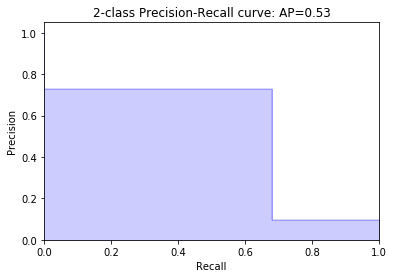

In [41]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(test_tags, output)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [46]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
y_true = test_tags
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.8478527390305026, 0.8267277428294966, 0.8368526325370217, None)

0.9441311023375322

In [31]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score

In [74]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
y_true = test_tags
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.6757025338455094, 0.599451538436703, 0.62667230742929, None)

0.9897537131039669

### 2.8.2 Severe toxic classification

In [47]:
train_tags = data['severe_toxic'][train_size:]
test_tags = data['severe_toxic'][:train_size]

In [48]:
train_tags=train_tags.astype(int)
test_tags=test_tags.astype(int)
encoder = LabelBinarizer()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [100]:
model.fit(x_train, y_train, batch_size = 200, epochs = 30, verbose = 1)
model.save('severe_toxic')

Epoch 1/30
127657/127657 [==============================] - 58s 456us/step - loss: 0.0341 - acc: 0.9890
Epoch 2/30
127657/127657 [==============================] - 61s 477us/step - loss: 0.0213 - acc: 0.9902
Epoch 3/30
127657/127657 [==============================] - 63s 490us/step - loss: 0.0182 - acc: 0.9909
Epoch 4/30
127657/127657 [==============================] - 59s 461us/step - loss: 0.0105 - acc: 0.9952
Epoch 7/30
127657/127657 [==============================] - 61s 480us/step - loss: 0.0088 - acc: 0.9961
Epoch 8/30
127657/127657 [==============================] - 60s 467us/step - loss: 0.0075 - acc: 0.9968
Epoch 9/30
127657/127657 [==============================] - 62s 483us/step - loss: 0.0068 - acc: 0.9974
Epoch 10/30
127657/127657 [==============================] - 56s 442us/step - loss: 0.0057 - acc: 0.9978
Epoch 11/30
127657/127657 [==============================] - 55s 427us/step - loss: 0.0051 - acc: 0.9981
Epoch 12/30
127657/127657 [==============================] - 5

In [50]:
model=load_model('severe_toxic.hd5')

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_5 (Bidirection (None, 1, 60)             727440    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 30)             1830      
_________________________________________________________________
bidirectional_6 (Bidirection (None, 1, 60)             14640     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 60)                21840     
_________________________________________________________________
activation_2 (Activation)    (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 122       
Total params: 765,872
Trainable params: 765,872
Non-trainable params: 0
_________________________________________________________________


In [52]:
score = model.evaluate(x_test, y_test, 
                       batch_size=2000, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

31914/31914 [==============================] - 6s 188us/step
Test score: 0.09165474421192307
Test accuracy: 0.9876229892310743


### 2.8.2.1 Test set results

In [53]:
output=model.predict(x_test).round(0).astype(int)[:,1]
x=pd.DataFrame({'Comment': test_posts, 'Severe_toxic': output})
x[x.Severe_toxic==1]


,Comment,Severe_toxic
43,fuck your filthy mother in the ass dry,1
55,stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell,1
211,fuck you block me you faggot pussy,1
238,u r a tw fuck off u gay boy u r smelly fuck ur mum poopie,1
312,fuck you fuck you award go fuck yourself,1
437,i never fucking made this mother fucking article i just fucking edited it and that was a fucking long time ago fucking assholes pissing me off,1
806,i shit on your face fuck you,1
887,you gay motherfucker i know where you live i am going to sand your face off then i am to going to beat you to a pulp you chicken shagger,1
952,you studid cock sucker u stop callin me ok its a frank garrett eatin the worms crawl outa your moms pussy you fucking retardo hit i retardo,1
982,leave me alone i told you already to leave me alone why can t you fuck off and do your own fucking thing or do you find that hounding me is amusing id u do then you are a mothafuckin asshole and i will ban you,1


### 2.8.2.2 Checking the classification metrics of the model

In [54]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
y_true = test_tags
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.6846881518942786, 0.6349067701802587, 0.6557720669281711, None)

0.9876229867769631

### 2.8.3 Obscene category classification

In [55]:
train_tags = data['obscene'][train_size:]
test_tags = data['obscene'][:train_size]
train_tags=train_tags.astype(int)
test_tags=test_tags.astype(int)
encoder = LabelBinarizer()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [106]:
model.fit(x_train, y_train, batch_size = 200, epochs = 30, verbose = 1)
model.save('obscene.hd5')
model.summary()

Epoch 1/30
127657/127657 [==============================] - 56s 437us/step - loss: 0.0771 - acc: 0.9759
Epoch 2/30
127657/127657 [==============================] - 46s 361us/step - loss: 0.0450 - acc: 0.9843
Epoch 3/30
127657/127657 [==============================] - 50s 393us/step - loss: 0.0299 - acc: 0.9896
Epoch 4/30
127657/127657 [==============================] - 46s 363us/step - loss: 0.0191 - acc: 0.9936
Epoch 5/30
127657/127657 [==============================] - 46s 360us/step - loss: 0.0127 - acc: 0.9960
Epoch 6/30
127657/127657 [==============================] - 46s 357us/step - loss: 0.0090 - acc: 0.9971
Epoch 7/30
127657/127657 [==============================] - 53s 413us/step - loss: 0.0067 - acc: 0.9980
Epoch 8/30
127657/127657 [==============================] - 55s 435us/step - loss: 0.0052 - acc: 0.9984
Epoch 9/30
127657/127657 [==============================] - 52s 411us/step - loss: 0.0045 - acc: 0.99860s - loss: 0.0045 - acc
Epoch 10/30
127657/127657 [==============

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_5 (Bidirection (None, 1, 60)             727440    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 30)             1830      
_________________________________________________________________
bidirectional_6 (Bidirection (None, 1, 60)             14640     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 60)                21840     
_________________________________________________________________
activation_2 (Activation)    (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 122       
Total params: 765,872
Trainable params: 765,872
Non-trainable params: 0
_________________________________________________________________


In [56]:
model=load_model('obscene.hd5')

### 2.8.3.1 Test set results

In [57]:
score = model.evaluate(x_test, y_test, 
                       batch_size=2000, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

31914/31914 [==============================] - 6s 179us/step
Test score: 0.2130636687484415
Test accuracy: 0.9745566301113637


In [58]:
output=model.predict(x_test).round(0).astype(int)[:,1]
x=pd.DataFrame({'Comment': test_posts, 'Obscene': output})
x[x.Obscene==1]

,Comment,Obscene
6,cocksucker before you piss around on my work,1
42,you are gay or antisemmitian archangel white tiger meow greetingshhh uh there are two ways why you do erased my comment about ww that holocaust was brutally slaying of jews and not gays gypsys slavs anyone if you are anti semitian than shave your head bald and go to the skinhead meetings if you doubt words of the bible that homosexuality is a deadly sin make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals first and last warning you fucking gay i won t appreciate if any more nazi shwain would write in my page i don t wish to talk to you anymore beware of the dark side,1
43,fuck your filthy mother in the ass dry,1
51,get fucked up get fuckeeed up got a drink that you cant put down get fuck up get fucked up i m fucked up right now,1
55,stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell,1
56,tony sidaway is obviously a fistfuckee he loves an arm up his ass,1
58,my band page s deletion you thought i was gone deleting the comment i posted on your talk page does not delete my feelings for your hasty decision to delete my page you sir are still a cock sucking douche fuck sit back for a second and think about what your life has become done that didn t take long did it nope because as i am most certainly aware your life is a shitstorm of sitting in front of the computer masturbating to fictional creatures your attempts to get rid of me are mediocre at best you are constantly sucking the dick of failure you don t want a personal attack huh well too bad fuckcock mcdickerson you ve got one from me you can go ahead and delete my profile from wikipedia i ll just make another one and come right back to syrthiss s talk page and insult the dick off of you how could you shatter the dreams of an innocent eighteen year old college freshman trying to make a name for his band does that make you happy fucking with people because you re an overweight single old man in a dead end job did you spot that perhaps someone else was going to follow his dreams and you were trying to hold him back so somebody else could suffer like you yes you did i don t make empty threats so i won t be saying anything along the lines of i ll hurt you or i ll eat the children from within your sister s womb but i will say that you are a asshole son of a bitch mother fucking cock sucker so go eat some more food and drown your sorrows you premature ejaculating bald headed fuck you should do something nice for yourself maybe go grab a couple of horny goat weeds from your local convenience store and jack off for a little longer than three minutes tonight sincerely an asshole that s better than you in every way,1
76,that s what i m looking through it looks like he was just being an all around dick on talk pages though it s nothing too bad though looks more like an inability to express himself properly thank you for your concern also cheers,1
139,lmao what a n b go and listen to manele,1
176,i think that your a fagget get a oife and burn in hell i hate you m sorry we cant have any more sex i m running out of conndoms,1


### 2.8.3.2 Checking the classification metrics of the model

In [59]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
y_true = test_tags
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.8892270980279958, 0.8444972831839008, 0.8653115595674762, None)

0.9745566209187191

### 2.8.4 Threat category classification

In [91]:
train_tags = data['threat'][train_size:]
test_tags = data['threat'][:train_size]
train_tags=train_tags.astype(int)
test_tags=test_tags.astype(int)
encoder = LabelBinarizer()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [110]:
model.fit(x_train, y_train, batch_size = 200, epochs = 30, verbose = 1)
model.save('threat.hd5')
model.summary()

Epoch 1/30
127657/127657 [==============================] - 58s 452us/step - loss: 0.0224 - acc: 0.9961
Epoch 2/30
127657/127657 [==============================] - 56s 443us/step - loss: 0.0093 - acc: 0.99713 - ETA: 1s - loss: 0.009
Epoch 3/30
127657/127657 [==============================] - 57s 444us/step - loss: 0.0057 - acc: 0.9977
Epoch 4/30
127657/127657 [==============================] - 57s 444us/step - loss: 0.0031 - acc: 0.9990
Epoch 5/30
127657/127657 [==============================] - 51s 400us/step - loss: 0.0019 - acc: 0.9995
Epoch 6/30
127657/127657 [==============================] - 46s 359us/step - loss: 0.0012 - acc: 0.9997
Epoch 7/30
127657/127657 [==============================] - 46s 359us/step - loss: 7.8173e-04 - acc: 0.9998
Epoch 8/30
127657/127657 [==============================] - ETA: 0s - loss: 7.0153e-04 - acc: 0.999 - 50s 389us/step - loss: 7.0122e-04 - acc: 0.9999
Epoch 9/30
127657/127657 [==============================] - 46s 362us/step - loss: 5.7279e-04

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_5 (Bidirection (None, 1, 60)             727440    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 30)             1830      
_________________________________________________________________
bidirectional_6 (Bidirection (None, 1, 60)             14640     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 60)                21840     
_________________________________________________________________
activation_2 (Activation)    (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 122       
Total params: 765,872
Trainable params: 765,872
Non-trainable params: 0
_________________________________________________________________


In [61]:
model=load_model('threat.hd5')

### 2.8.4.1 Test set results

In [62]:
score = model.evaluate(x_test, y_test, 
                       batch_size=2000, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

31914/31914 [==============================] - 6s 202us/step
Test score: 0.030729819183608058
Test accuracy: 0.9968039196722563


In [63]:
output=model.predict(x_test).round(0).astype(int)[:,1]
x=pd.DataFrame({'Comment': test_posts, 'Threat': output})
x[x.Threat==1]

Comment  \
600    i m also a sock puppet of this account suprise sincerely the man that will track you down from the internet and kill you                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

### 2.8.4.2 Checking the classification metrics of the model

In [64]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
y_true = test_tags
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.7618402890146687, 0.5958709162575871, 0.6400442664781832, None)

0.9968039105094942

### 2.8.5 Insult category classification

In [65]:
train_tags = data['insult'][train_size:]
test_tags = data['insult'][:train_size]
train_tags=train_tags.astype(int)
test_tags=test_tags.astype(int)
encoder = LabelBinarizer()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [116]:
model.fit(x_train, y_train, batch_size = 200, epochs = 30, verbose = 1)
model.save('insult.hd5')
model.summary()

Epoch 1/30
127657/127657 [==============================] - 53s 419us/step - loss: 0.0893 - acc: 0.9715
Epoch 2/30
127657/127657 [==============================] - 49s 385us/step - loss: 0.0520 - acc: 0.9816
Epoch 3/30
127657/127657 [==============================] - 51s 401us/step - loss: 0.0333 - acc: 0.9885
Epoch 4/30
127657/127657 [==============================] - 54s 425us/step - loss: 0.0209 - acc: 0.9932
Epoch 5/30
127657/127657 [==============================] - 52s 405us/step - loss: 0.0143 - acc: 0.9955
Epoch 6/30
127657/127657 [==============================] - 55s 432us/step - loss: 0.0105 - acc: 0.9968
Epoch 7/30
127657/127657 [==============================] - 54s 423us/step - loss: 0.0086 - acc: 0.9973
Epoch 8/30
127657/127657 [==============================] - 53s 417us/step - loss: 0.0071 - acc: 0.9978
Epoch 9/30
127657/127657 [==============================] - 54s 424us/step - loss: 0.0065 - acc: 0.9981
Epoch 10/30
127657/127657 [==============================] - 54s

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_5 (Bidirection (None, 1, 60)             727440    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 30)             1830      
_________________________________________________________________
bidirectional_6 (Bidirection (None, 1, 60)             14640     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 60)                21840     
_________________________________________________________________
activation_2 (Activation)    (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 122       
Total params: 765,872
Trainable params: 765,872
Non-trainable params: 0
_________________________________________________________________


In [66]:
model=load_model('insult.hd5')

### 2.8.5.1 Test set results

In [67]:
score = model.evaluate(x_test, y_test, 
                       batch_size=2000, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

31914/31914 [==============================] - 6s 202us/step
Test score: 0.2561724340492841
Test accuracy: 0.9650310181417942


In [68]:
output=model.predict(x_test).round(0).astype(int)[:,1]
x=pd.DataFrame({'Comment': test_posts, 'Insult': output})
x[x.Insult==1]

,Comment,Insult
6,cocksucker before you piss around on my work,1
42,you are gay or antisemmitian archangel white tiger meow greetingshhh uh there are two ways why you do erased my comment about ww that holocaust was brutally slaying of jews and not gays gypsys slavs anyone if you are anti semitian than shave your head bald and go to the skinhead meetings if you doubt words of the bible that homosexuality is a deadly sin make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals first and last warning you fucking gay i won t appreciate if any more nazi shwain would write in my page i don t wish to talk to you anymore beware of the dark side,1
43,fuck your filthy mother in the ass dry,1
55,stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell,1
56,tony sidaway is obviously a fistfuckee he loves an arm up his ass,1
86,would you both shut up you don t run wikipedia especially a stupid kid,1
105,a pair of jew hating weiner nazi schmucks,1
139,lmao what a n b go and listen to manele,1
176,i think that your a fagget get a oife and burn in hell i hate you m sorry we cant have any more sex i m running out of conndoms,1
181,you are a stupid fuck and your mother s cunt stinks,1


### 2.8.5.2 Checking the classification metrics of the model

In [69]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
y_true = test_tags
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.8235382640501046, 0.7886375794756033, 0.8049502087769587, None)

0.9650310208685843

### 2.8.6 Hate category classification

In [110]:
train_tags = data['identity_hate'][train_size:]
test_tags = data['identity_hate'][:train_size]
train_tags=train_tags.astype(int)
test_tags=test_tags.astype(int)
encoder = LabelBinarizer()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [116]:
model.fit(x_train, y_train, batch_size = 200, epochs = 30, verbose = 1)

Epoch 1/30
 40800/127657 [========>.....................] - ETA: 1:52:38 - loss: 0.6933 - acc: 0.33 - ETA: 56:51 - loss: 0.6920 - acc: 0.6625 - ETA: 38:15 - loss: 0.6908 - acc: 0.77 - ETA: 28:57 - loss: 0.6894 - acc: 0.82 - ETA: 23:22 - loss: 0.6880 - acc: 0.85 - ETA: 19:38 - loss: 0.6865 - acc: 0.87 - ETA: 16:58 - loss: 0.6850 - acc: 0.89 - ETA: 14:57 - loss: 0.6833 - acc: 0.90 - ETA: 13:25 - loss: 0.6814 - acc: 0.91 - ETA: 12:09 - loss: 0.6794 - acc: 0.92 - ETA: 11:08 - loss: 0.6774 - acc: 0.92 - ETA: 10:17 - loss: 0.6753 - acc: 0.93 - ETA: 9:34 - loss: 0.6728 - acc: 0.9369 - ETA: 8:59 - loss: 0.6700 - acc: 0.940 - ETA: 8:26 - loss: 0.6671 - acc: 0.944 - ETA: 7:58 - loss: 0.6641 - acc: 0.947 - ETA: 7:33 - loss: 0.6609 - acc: 0.948 - ETA: 7:11 - loss: 0.6575 - acc: 0.951 - ETA: 6:51 - loss: 0.6539 - acc: 0.952 - ETA: 6:33 - loss: 0.6494 - acc: 0.955 - ETA: 6:17 - loss: 0.6449 - acc: 0.956 - ETA: 6:02 - loss: 0.6399 - acc: 0.958 - ETA: 5:49 - loss: 0.6353 - acc: 0.960 - ETA: 5:36 - los

 42600/127657 [=========>....................] - ETA: 1:15 - loss: 0.0235 - acc: 0.980 - ETA: 1:16 - loss: 0.0221 - acc: 0.987 - ETA: 1:17 - loss: 0.0264 - acc: 0.990 - ETA: 1:14 - loss: 0.0364 - acc: 0.988 - ETA: 1:12 - loss: 0.0308 - acc: 0.991 - ETA: 1:10 - loss: 0.0338 - acc: 0.990 - ETA: 1:09 - loss: 0.0318 - acc: 0.990 - ETA: 1:08 - loss: 0.0304 - acc: 0.991 - ETA: 1:07 - loss: 0.0324 - acc: 0.990 - ETA: 1:06 - loss: 0.0330 - acc: 0.991 - ETA: 1:07 - loss: 0.0348 - acc: 0.990 - ETA: 1:07 - loss: 0.0330 - acc: 0.990 - ETA: 1:07 - loss: 0.0335 - acc: 0.990 - ETA: 1:08 - loss: 0.0322 - acc: 0.990 - ETA: 1:07 - loss: 0.0312 - acc: 0.990 - ETA: 1:07 - loss: 0.0302 - acc: 0.990 - ETA: 1:06 - loss: 0.0341 - acc: 0.990 - ETA: 1:06 - loss: 0.0337 - acc: 0.990 - ETA: 1:05 - loss: 0.0326 - acc: 0.990 - ETA: 1:05 - loss: 0.0319 - acc: 0.990 - ETA: 1:05 - loss: 0.0324 - acc: 0.990 - ETA: 1:04 - loss: 0.0314 - acc: 0.990 - ETA: 1:03 - loss: 0.0331 - acc: 0.990 - ETA: 1:03 - loss: 0.0326 - acc:

 43000/127657 [=========>....................] - ETA: 54s - loss: 0.0199 - acc: 0.99 - ETA: 53s - loss: 0.0263 - acc: 0.98 - ETA: 53s - loss: 0.0213 - acc: 0.99 - ETA: 54s - loss: 0.0236 - acc: 0.99 - ETA: 54s - loss: 0.0230 - acc: 0.99 - ETA: 54s - loss: 0.0241 - acc: 0.99 - ETA: 54s - loss: 0.0230 - acc: 0.99 - ETA: 54s - loss: 0.0237 - acc: 0.99 - ETA: 53s - loss: 0.0219 - acc: 0.99 - ETA: 53s - loss: 0.0224 - acc: 0.99 - ETA: 53s - loss: 0.0215 - acc: 0.99 - ETA: 53s - loss: 0.0230 - acc: 0.99 - ETA: 52s - loss: 0.0221 - acc: 0.99 - ETA: 52s - loss: 0.0225 - acc: 0.99 - ETA: 52s - loss: 0.0222 - acc: 0.99 - ETA: 52s - loss: 0.0230 - acc: 0.99 - ETA: 52s - loss: 0.0227 - acc: 0.99 - ETA: 52s - loss: 0.0224 - acc: 0.99 - ETA: 51s - loss: 0.0219 - acc: 0.99 - ETA: 51s - loss: 0.0220 - acc: 0.99 - ETA: 51s - loss: 0.0217 - acc: 0.99 - ETA: 51s - loss: 0.0226 - acc: 0.99 - ETA: 51s - loss: 0.0227 - acc: 0.99 - ETA: 51s - loss: 0.0234 - acc: 0.99 - ETA: 51s - loss: 0.0233 - acc: 0.99 - E

127657/127657 [==============================] - ETA: 18s - loss: 0.0213 - acc: 0.99 - ETA: 18s - loss: 0.0212 - acc: 0.99 - ETA: 18s - loss: 0.0212 - acc: 0.99 - ETA: 18s - loss: 0.0213 - acc: 0.99 - ETA: 18s - loss: 0.0213 - acc: 0.99 - ETA: 18s - loss: 0.0213 - acc: 0.99 - ETA: 17s - loss: 0.0213 - acc: 0.99 - ETA: 17s - loss: 0.0215 - acc: 0.99 - ETA: 17s - loss: 0.0214 - acc: 0.99 - ETA: 17s - loss: 0.0214 - acc: 0.99 - ETA: 17s - loss: 0.0214 - acc: 0.99 - ETA: 17s - loss: 0.0214 - acc: 0.99 - ETA: 17s - loss: 0.0214 - acc: 0.99 - ETA: 17s - loss: 0.0214 - acc: 0.99 - ETA: 17s - loss: 0.0213 - acc: 0.99 - ETA: 17s - loss: 0.0213 - acc: 0.99 - ETA: 17s - loss: 0.0213 - acc: 0.99 - ETA: 17s - loss: 0.0213 - acc: 0.99 - ETA: 16s - loss: 0.0213 - acc: 0.99 - ETA: 16s - loss: 0.0213 - acc: 0.99 - ETA: 16s - loss: 0.0212 - acc: 0.99 - ETA: 16s - loss: 0.0212 - acc: 0.99 - ETA: 16s - loss: 0.0212 - acc: 0.99 - ETA: 16s - loss: 0.0212 - acc: 0.99 - ETA: 16s - loss: 0.0212 - acc: 0.99 - E

 42600/127657 [=========>....................] - ETA: 1:01 - loss: 0.0071 - acc: 1.000 - ETA: 1:01 - loss: 0.0072 - acc: 0.997 - ETA: 1:03 - loss: 0.0100 - acc: 0.996 - ETA: 1:03 - loss: 0.0090 - acc: 0.997 - ETA: 1:12 - loss: 0.0203 - acc: 0.995 - ETA: 1:11 - loss: 0.0216 - acc: 0.993 - ETA: 1:10 - loss: 0.0192 - acc: 0.994 - ETA: 1:08 - loss: 0.0175 - acc: 0.995 - ETA: 1:07 - loss: 0.0160 - acc: 0.995 - ETA: 1:06 - loss: 0.0173 - acc: 0.995 - ETA: 1:05 - loss: 0.0170 - acc: 0.995 - ETA: 1:05 - loss: 0.0161 - acc: 0.995 - ETA: 1:05 - loss: 0.0176 - acc: 0.994 - ETA: 1:07 - loss: 0.0195 - acc: 0.994 - ETA: 1:06 - loss: 0.0183 - acc: 0.995 - ETA: 1:06 - loss: 0.0181 - acc: 0.994 - ETA: 1:05 - loss: 0.0171 - acc: 0.995 - ETA: 1:05 - loss: 0.0163 - acc: 0.995 - ETA: 1:04 - loss: 0.0156 - acc: 0.995 - ETA: 1:04 - loss: 0.0170 - acc: 0.995 - ETA: 1:03 - loss: 0.0172 - acc: 0.995 - ETA: 1:03 - loss: 0.0167 - acc: 0.995 - ETA: 1:03 - loss: 0.0179 - acc: 0.995 - ETA: 1:02 - loss: 0.0192 - acc:

127657/127657 [==============================] - ETA: 21s - loss: 0.0145 - acc: 0.99 - ETA: 20s - loss: 0.0145 - acc: 0.99 - ETA: 20s - loss: 0.0145 - acc: 0.99 - ETA: 20s - loss: 0.0145 - acc: 0.99 - ETA: 20s - loss: 0.0144 - acc: 0.99 - ETA: 20s - loss: 0.0144 - acc: 0.99 - ETA: 20s - loss: 0.0144 - acc: 0.99 - ETA: 20s - loss: 0.0144 - acc: 0.99 - ETA: 20s - loss: 0.0144 - acc: 0.99 - ETA: 20s - loss: 0.0144 - acc: 0.99 - ETA: 20s - loss: 0.0144 - acc: 0.99 - ETA: 19s - loss: 0.0143 - acc: 0.99 - ETA: 19s - loss: 0.0144 - acc: 0.99 - ETA: 19s - loss: 0.0144 - acc: 0.99 - ETA: 19s - loss: 0.0145 - acc: 0.99 - ETA: 19s - loss: 0.0144 - acc: 0.99 - ETA: 19s - loss: 0.0144 - acc: 0.99 - ETA: 19s - loss: 0.0144 - acc: 0.99 - ETA: 19s - loss: 0.0144 - acc: 0.99 - ETA: 19s - loss: 0.0144 - acc: 0.99 - ETA: 18s - loss: 0.0145 - acc: 0.99 - ETA: 18s - loss: 0.0145 - acc: 0.99 - ETA: 18s - loss: 0.0144 - acc: 0.99 - ETA: 18s - loss: 0.0144 - acc: 0.99 - ETA: 18s - loss: 0.0144 - acc: 0.99 - E

 42600/127657 [=========>....................] - ETA: 1:03 - loss: 0.0126 - acc: 0.995 - ETA: 59s - loss: 0.0100 - acc: 0.995 - ETA: 1:02 - loss: 0.0077 - acc: 0.996 - ETA: 1:01 - loss: 0.0069 - acc: 0.997 - ETA: 1:01 - loss: 0.0075 - acc: 0.998 - ETA: 1:02 - loss: 0.0066 - acc: 0.998 - ETA: 1:02 - loss: 0.0081 - acc: 0.997 - ETA: 1:03 - loss: 0.0075 - acc: 0.998 - ETA: 1:03 - loss: 0.0067 - acc: 0.998 - ETA: 1:03 - loss: 0.0063 - acc: 0.998 - ETA: 1:03 - loss: 0.0079 - acc: 0.997 - ETA: 1:02 - loss: 0.0087 - acc: 0.996 - ETA: 1:02 - loss: 0.0084 - acc: 0.996 - ETA: 1:02 - loss: 0.0109 - acc: 0.996 - ETA: 1:02 - loss: 0.0109 - acc: 0.996 - ETA: 1:02 - loss: 0.0121 - acc: 0.995 - ETA: 1:01 - loss: 0.0118 - acc: 0.996 - ETA: 1:01 - loss: 0.0115 - acc: 0.996 - ETA: 1:01 - loss: 0.0112 - acc: 0.996 - ETA: 1:00 - loss: 0.0112 - acc: 0.996 - ETA: 1:00 - loss: 0.0114 - acc: 0.996 - ETA: 1:00 - loss: 0.0111 - acc: 0.996 - ETA: 1:00 - loss: 0.0116 - acc: 0.995 - ETA: 1:00 - loss: 0.0115 - acc: 

127657/127657 [==============================] - ETA: 20s - loss: 0.0097 - acc: 0.99 - ETA: 20s - loss: 0.0097 - acc: 0.99 - ETA: 20s - loss: 0.0097 - acc: 0.99 - ETA: 20s - loss: 0.0097 - acc: 0.99 - ETA: 19s - loss: 0.0097 - acc: 0.99 - ETA: 19s - loss: 0.0097 - acc: 0.99 - ETA: 19s - loss: 0.0097 - acc: 0.99 - ETA: 19s - loss: 0.0097 - acc: 0.99 - ETA: 19s - loss: 0.0098 - acc: 0.99 - ETA: 19s - loss: 0.0098 - acc: 0.99 - ETA: 19s - loss: 0.0098 - acc: 0.99 - ETA: 19s - loss: 0.0098 - acc: 0.99 - ETA: 19s - loss: 0.0098 - acc: 0.99 - ETA: 19s - loss: 0.0098 - acc: 0.99 - ETA: 18s - loss: 0.0099 - acc: 0.99 - ETA: 18s - loss: 0.0099 - acc: 0.99 - ETA: 18s - loss: 0.0098 - acc: 0.99 - ETA: 18s - loss: 0.0099 - acc: 0.99 - ETA: 18s - loss: 0.0099 - acc: 0.99 - ETA: 18s - loss: 0.0099 - acc: 0.99 - ETA: 18s - loss: 0.0098 - acc: 0.99 - ETA: 18s - loss: 0.0098 - acc: 0.99 - ETA: 18s - loss: 0.0098 - acc: 0.99 - ETA: 18s - loss: 0.0098 - acc: 0.99 - ETA: 17s - loss: 0.0098 - acc: 0.99 - E

 42600/127657 [=========>....................] - ETA: 58s - loss: 0.0023 - acc: 1.00 - ETA: 58s - loss: 0.0026 - acc: 1.00 - ETA: 1:01 - loss: 0.0029 - acc: 1.000 - ETA: 59s - loss: 0.0022 - acc: 1.000 - ETA: 59s - loss: 0.0019 - acc: 1.00 - ETA: 1:00 - loss: 0.0075 - acc: 0.998 - ETA: 1:00 - loss: 0.0066 - acc: 0.998 - ETA: 1:00 - loss: 0.0058 - acc: 0.998 - ETA: 1:00 - loss: 0.0052 - acc: 0.998 - ETA: 1:00 - loss: 0.0049 - acc: 0.999 - ETA: 1:00 - loss: 0.0052 - acc: 0.998 - ETA: 1:00 - loss: 0.0048 - acc: 0.998 - ETA: 1:00 - loss: 0.0056 - acc: 0.998 - ETA: 1:00 - loss: 0.0065 - acc: 0.998 - ETA: 1:00 - loss: 0.0061 - acc: 0.998 - ETA: 1:00 - loss: 0.0086 - acc: 0.998 - ETA: 1:00 - loss: 0.0083 - acc: 0.998 - ETA: 1:00 - loss: 0.0086 - acc: 0.998 - ETA: 1:00 - loss: 0.0084 - acc: 0.998 - ETA: 1:00 - loss: 0.0094 - acc: 0.998 - ETA: 1:00 - loss: 0.0092 - acc: 0.998 - ETA: 1:00 - loss: 0.0089 - acc: 0.998 - ETA: 1:00 - loss: 0.0089 - acc: 0.998 - ETA: 1:00 - loss: 0.0091 - acc: 0.997 

127657/127657 [==============================] - ETA: 20s - loss: 0.0075 - acc: 0.99 - ETA: 20s - loss: 0.0075 - acc: 0.99 - ETA: 20s - loss: 0.0075 - acc: 0.99 - ETA: 20s - loss: 0.0075 - acc: 0.99 - ETA: 20s - loss: 0.0075 - acc: 0.99 - ETA: 20s - loss: 0.0075 - acc: 0.99 - ETA: 20s - loss: 0.0075 - acc: 0.99 - ETA: 20s - loss: 0.0075 - acc: 0.99 - ETA: 20s - loss: 0.0075 - acc: 0.99 - ETA: 20s - loss: 0.0075 - acc: 0.99 - ETA: 19s - loss: 0.0075 - acc: 0.99 - ETA: 19s - loss: 0.0075 - acc: 0.99 - ETA: 19s - loss: 0.0075 - acc: 0.99 - ETA: 19s - loss: 0.0075 - acc: 0.99 - ETA: 19s - loss: 0.0075 - acc: 0.99 - ETA: 19s - loss: 0.0075 - acc: 0.99 - ETA: 19s - loss: 0.0075 - acc: 0.99 - ETA: 19s - loss: 0.0075 - acc: 0.99 - ETA: 19s - loss: 0.0074 - acc: 0.99 - ETA: 19s - loss: 0.0074 - acc: 0.99 - ETA: 18s - loss: 0.0075 - acc: 0.99 - ETA: 18s - loss: 0.0075 - acc: 0.99 - ETA: 18s - loss: 0.0074 - acc: 0.99 - ETA: 18s - loss: 0.0074 - acc: 0.99 - ETA: 18s - loss: 0.0075 - acc: 0.99 - E

 42600/127657 [=========>....................] - ETA: 56s - loss: 2.0381e-04 - acc: 1.00 - ETA: 1:02 - loss: 0.0257 - acc: 0.9950   - ETA: 1:01 - loss: 0.0219 - acc: 0.995 - ETA: 1:01 - loss: 0.0165 - acc: 0.996 - ETA: 1:02 - loss: 0.0133 - acc: 0.997 - ETA: 1:01 - loss: 0.0114 - acc: 0.997 - ETA: 1:01 - loss: 0.0098 - acc: 0.997 - ETA: 1:00 - loss: 0.0086 - acc: 0.998 - ETA: 1:01 - loss: 0.0080 - acc: 0.998 - ETA: 1:01 - loss: 0.0081 - acc: 0.998 - ETA: 1:01 - loss: 0.0077 - acc: 0.998 - ETA: 1:01 - loss: 0.0071 - acc: 0.998 - ETA: 1:01 - loss: 0.0100 - acc: 0.998 - ETA: 1:01 - loss: 0.0093 - acc: 0.998 - ETA: 1:01 - loss: 0.0087 - acc: 0.998 - ETA: 1:00 - loss: 0.0085 - acc: 0.998 - ETA: 1:00 - loss: 0.0097 - acc: 0.997 - ETA: 1:00 - loss: 0.0097 - acc: 0.996 - ETA: 1:00 - loss: 0.0096 - acc: 0.996 - ETA: 1:00 - loss: 0.0091 - acc: 0.997 - ETA: 1:01 - loss: 0.0087 - acc: 0.997 - ETA: 1:00 - loss: 0.0103 - acc: 0.997 - ETA: 1:01 - loss: 0.0099 - acc: 0.997 - ETA: 1:00 - loss: 0.0097 -

127657/127657 [==============================] - ETA: 20s - loss: 0.0064 - acc: 0.99 - ETA: 20s - loss: 0.0065 - acc: 0.99 - ETA: 20s - loss: 0.0066 - acc: 0.99 - ETA: 20s - loss: 0.0066 - acc: 0.99 - ETA: 20s - loss: 0.0066 - acc: 0.99 - ETA: 20s - loss: 0.0065 - acc: 0.99 - ETA: 20s - loss: 0.0065 - acc: 0.99 - ETA: 20s - loss: 0.0065 - acc: 0.99 - ETA: 19s - loss: 0.0065 - acc: 0.99 - ETA: 19s - loss: 0.0065 - acc: 0.99 - ETA: 19s - loss: 0.0065 - acc: 0.99 - ETA: 19s - loss: 0.0065 - acc: 0.99 - ETA: 19s - loss: 0.0065 - acc: 0.99 - ETA: 19s - loss: 0.0065 - acc: 0.99 - ETA: 19s - loss: 0.0065 - acc: 0.99 - ETA: 19s - loss: 0.0065 - acc: 0.99 - ETA: 19s - loss: 0.0065 - acc: 0.99 - ETA: 19s - loss: 0.0065 - acc: 0.99 - ETA: 18s - loss: 0.0065 - acc: 0.99 - ETA: 18s - loss: 0.0065 - acc: 0.99 - ETA: 18s - loss: 0.0065 - acc: 0.99 - ETA: 18s - loss: 0.0065 - acc: 0.99 - ETA: 18s - loss: 0.0065 - acc: 0.99 - ETA: 18s - loss: 0.0065 - acc: 0.99 - ETA: 18s - loss: 0.0065 - acc: 0.99 - E

 42800/127657 [=========>....................] - ETA: 1:00 - loss: 9.9977e-04 - acc: 1.000 - ETA: 1:00 - loss: 8.1455e-04 - acc: 1.000 - ETA: 59s - loss: 0.0011 - acc: 1.0000    - ETA: 58s - loss: 9.9999e-04 - acc: 1.00 - ETA: 59s - loss: 0.0031 - acc: 0.9980   - ETA: 59s - loss: 0.0042 - acc: 0.99 - ETA: 58s - loss: 0.0037 - acc: 0.99 - ETA: 59s - loss: 0.0034 - acc: 0.99 - ETA: 59s - loss: 0.0031 - acc: 0.99 - ETA: 59s - loss: 0.0029 - acc: 0.99 - ETA: 59s - loss: 0.0028 - acc: 0.99 - ETA: 59s - loss: 0.0027 - acc: 0.99 - ETA: 59s - loss: 0.0026 - acc: 0.99 - ETA: 59s - loss: 0.0025 - acc: 0.99 - ETA: 58s - loss: 0.0024 - acc: 0.99 - ETA: 58s - loss: 0.0023 - acc: 0.99 - ETA: 58s - loss: 0.0022 - acc: 0.99 - ETA: 58s - loss: 0.0021 - acc: 0.99 - ETA: 58s - loss: 0.0021 - acc: 0.99 - ETA: 58s - loss: 0.0021 - acc: 0.99 - ETA: 58s - loss: 0.0020 - acc: 0.99 - ETA: 58s - loss: 0.0039 - acc: 0.99 - ETA: 58s - loss: 0.0038 - acc: 0.99 - ETA: 58s - loss: 0.0038 - acc: 0.99 - ETA: 58s - los

127657/127657 [==============================] - ETA: 20s - loss: 0.0048 - acc: 0.99 - ETA: 20s - loss: 0.0048 - acc: 0.99 - ETA: 19s - loss: 0.0048 - acc: 0.99 - ETA: 19s - loss: 0.0048 - acc: 0.99 - ETA: 19s - loss: 0.0047 - acc: 0.99 - ETA: 19s - loss: 0.0048 - acc: 0.99 - ETA: 19s - loss: 0.0048 - acc: 0.99 - ETA: 19s - loss: 0.0048 - acc: 0.99 - ETA: 19s - loss: 0.0048 - acc: 0.99 - ETA: 19s - loss: 0.0048 - acc: 0.99 - ETA: 19s - loss: 0.0048 - acc: 0.99 - ETA: 19s - loss: 0.0048 - acc: 0.99 - ETA: 18s - loss: 0.0048 - acc: 0.99 - ETA: 18s - loss: 0.0048 - acc: 0.99 - ETA: 18s - loss: 0.0047 - acc: 0.99 - ETA: 18s - loss: 0.0047 - acc: 0.99 - ETA: 18s - loss: 0.0047 - acc: 0.99 - ETA: 18s - loss: 0.0047 - acc: 0.99 - ETA: 18s - loss: 0.0047 - acc: 0.99 - ETA: 18s - loss: 0.0047 - acc: 0.99 - ETA: 18s - loss: 0.0048 - acc: 0.99 - ETA: 18s - loss: 0.0048 - acc: 0.99 - ETA: 17s - loss: 0.0048 - acc: 0.99 - ETA: 17s - loss: 0.0048 - acc: 0.99 - ETA: 17s - loss: 0.0048 - acc: 0.99 - E

 43000/127657 [=========>....................] - ETA: 56s - loss: 0.0153 - acc: 0.99 - ETA: 56s - loss: 0.0120 - acc: 0.99 - ETA: 55s - loss: 0.0081 - acc: 0.99 - ETA: 56s - loss: 0.0064 - acc: 0.99 - ETA: 57s - loss: 0.0052 - acc: 0.99 - ETA: 56s - loss: 0.0044 - acc: 0.99 - ETA: 57s - loss: 0.0041 - acc: 0.99 - ETA: 58s - loss: 0.0053 - acc: 0.99 - ETA: 58s - loss: 0.0048 - acc: 0.99 - ETA: 58s - loss: 0.0045 - acc: 0.99 - ETA: 58s - loss: 0.0041 - acc: 0.99 - ETA: 58s - loss: 0.0038 - acc: 0.99 - ETA: 57s - loss: 0.0036 - acc: 0.99 - ETA: 57s - loss: 0.0035 - acc: 0.99 - ETA: 57s - loss: 0.0033 - acc: 0.99 - ETA: 57s - loss: 0.0031 - acc: 0.99 - ETA: 57s - loss: 0.0034 - acc: 0.99 - ETA: 57s - loss: 0.0036 - acc: 0.99 - ETA: 57s - loss: 0.0035 - acc: 0.99 - ETA: 57s - loss: 0.0034 - acc: 0.99 - ETA: 57s - loss: 0.0032 - acc: 0.99 - ETA: 57s - loss: 0.0033 - acc: 0.99 - ETA: 56s - loss: 0.0032 - acc: 0.99 - ETA: 56s - loss: 0.0032 - acc: 0.99 - ETA: 56s - loss: 0.0031 - acc: 0.99 - E

127657/127657 [==============================] - ETA: 20s - loss: 0.0042 - acc: 0.99 - ETA: 19s - loss: 0.0042 - acc: 0.99 - ETA: 19s - loss: 0.0042 - acc: 0.99 - ETA: 19s - loss: 0.0042 - acc: 0.99 - ETA: 19s - loss: 0.0042 - acc: 0.99 - ETA: 19s - loss: 0.0042 - acc: 0.99 - ETA: 19s - loss: 0.0042 - acc: 0.99 - ETA: 19s - loss: 0.0042 - acc: 0.99 - ETA: 19s - loss: 0.0042 - acc: 0.99 - ETA: 19s - loss: 0.0042 - acc: 0.99 - ETA: 19s - loss: 0.0042 - acc: 0.99 - ETA: 18s - loss: 0.0042 - acc: 0.99 - ETA: 18s - loss: 0.0042 - acc: 0.99 - ETA: 18s - loss: 0.0042 - acc: 0.99 - ETA: 18s - loss: 0.0042 - acc: 0.99 - ETA: 18s - loss: 0.0043 - acc: 0.99 - ETA: 18s - loss: 0.0043 - acc: 0.99 - ETA: 18s - loss: 0.0043 - acc: 0.99 - ETA: 18s - loss: 0.0043 - acc: 0.99 - ETA: 18s - loss: 0.0043 - acc: 0.99 - ETA: 18s - loss: 0.0043 - acc: 0.99 - ETA: 18s - loss: 0.0043 - acc: 0.99 - ETA: 17s - loss: 0.0043 - acc: 0.99 - ETA: 17s - loss: 0.0044 - acc: 0.99 - ETA: 17s - loss: 0.0044 - acc: 0.99 - E

 42600/127657 [=========>....................] - ETA: 59s - loss: 2.7467e-04 - acc: 1.00 - ETA: 1:00 - loss: 4.7187e-04 - acc: 1.000 - ETA: 1:02 - loss: 4.2187e-04 - acc: 1.000 - ETA: 1:02 - loss: 3.8449e-04 - acc: 1.000 - ETA: 1:01 - loss: 0.0038 - acc: 0.9990    - ETA: 1:01 - loss: 0.0033 - acc: 0.999 - ETA: 1:02 - loss: 0.0028 - acc: 0.999 - ETA: 1:02 - loss: 0.0026 - acc: 0.999 - ETA: 1:01 - loss: 0.0023 - acc: 0.999 - ETA: 1:01 - loss: 0.0023 - acc: 0.999 - ETA: 1:01 - loss: 0.0021 - acc: 0.999 - ETA: 1:01 - loss: 0.0019 - acc: 0.999 - ETA: 1:01 - loss: 0.0018 - acc: 0.999 - ETA: 1:01 - loss: 0.0018 - acc: 0.999 - ETA: 1:00 - loss: 0.0018 - acc: 0.999 - ETA: 1:00 - loss: 0.0021 - acc: 0.999 - ETA: 1:00 - loss: 0.0047 - acc: 0.999 - ETA: 1:00 - loss: 0.0044 - acc: 0.999 - ETA: 1:00 - loss: 0.0042 - acc: 0.999 - ETA: 1:00 - loss: 0.0040 - acc: 0.999 - ETA: 1:00 - loss: 0.0039 - acc: 0.999 - ETA: 1:00 - loss: 0.0037 - acc: 0.999 - ETA: 1:00 - loss: 0.0036 - acc: 0.999 - ETA: 1:00 - l

127657/127657 [==============================] - ETA: 20s - loss: 0.0036 - acc: 0.99 - ETA: 20s - loss: 0.0036 - acc: 0.99 - ETA: 20s - loss: 0.0036 - acc: 0.99 - ETA: 20s - loss: 0.0036 - acc: 0.99 - ETA: 20s - loss: 0.0036 - acc: 0.99 - ETA: 19s - loss: 0.0036 - acc: 0.99 - ETA: 19s - loss: 0.0036 - acc: 0.99 - ETA: 19s - loss: 0.0036 - acc: 0.99 - ETA: 19s - loss: 0.0036 - acc: 0.99 - ETA: 19s - loss: 0.0036 - acc: 0.99 - ETA: 19s - loss: 0.0036 - acc: 0.99 - ETA: 19s - loss: 0.0036 - acc: 0.99 - ETA: 19s - loss: 0.0036 - acc: 0.99 - ETA: 19s - loss: 0.0036 - acc: 0.99 - ETA: 19s - loss: 0.0036 - acc: 0.99 - ETA: 18s - loss: 0.0036 - acc: 0.99 - ETA: 18s - loss: 0.0036 - acc: 0.99 - ETA: 18s - loss: 0.0036 - acc: 0.99 - ETA: 18s - loss: 0.0036 - acc: 0.99 - ETA: 18s - loss: 0.0036 - acc: 0.99 - ETA: 18s - loss: 0.0037 - acc: 0.99 - ETA: 18s - loss: 0.0037 - acc: 0.99 - ETA: 18s - loss: 0.0037 - acc: 0.99 - ETA: 18s - loss: 0.0037 - acc: 0.99 - ETA: 18s - loss: 0.0037 - acc: 0.99 - E

 42800/127657 [=========>....................] - ETA: 57s - loss: 1.8750e-04 - acc: 1.00 - ETA: 57s - loss: 3.1662e-04 - acc: 1.00 - ETA: 58s - loss: 0.0011 - acc: 1.0000   - ETA: 1:00 - loss: 0.0030 - acc: 0.998 - ETA: 1:00 - loss: 0.0112 - acc: 0.998 - ETA: 59s - loss: 0.0094 - acc: 0.998 - ETA: 59s - loss: 0.0081 - acc: 0.99 - ETA: 59s - loss: 0.0071 - acc: 0.99 - ETA: 59s - loss: 0.0063 - acc: 0.99 - ETA: 59s - loss: 0.0057 - acc: 0.99 - ETA: 59s - loss: 0.0053 - acc: 0.99 - ETA: 59s - loss: 0.0052 - acc: 0.99 - ETA: 59s - loss: 0.0048 - acc: 0.99 - ETA: 58s - loss: 0.0045 - acc: 0.99 - ETA: 58s - loss: 0.0043 - acc: 0.99 - ETA: 58s - loss: 0.0041 - acc: 0.99 - ETA: 58s - loss: 0.0038 - acc: 0.99 - ETA: 58s - loss: 0.0036 - acc: 0.99 - ETA: 59s - loss: 0.0035 - acc: 0.99 - ETA: 59s - loss: 0.0033 - acc: 0.99 - ETA: 58s - loss: 0.0033 - acc: 0.99 - ETA: 58s - loss: 0.0031 - acc: 0.99 - ETA: 58s - loss: 0.0030 - acc: 0.99 - ETA: 58s - loss: 0.0033 - acc: 0.99 - ETA: 58s - loss: 0.003

127657/127657 [==============================] - ETA: 20s - loss: 0.0040 - acc: 0.99 - ETA: 20s - loss: 0.0040 - acc: 0.99 - ETA: 19s - loss: 0.0040 - acc: 0.99 - ETA: 19s - loss: 0.0040 - acc: 0.99 - ETA: 19s - loss: 0.0040 - acc: 0.99 - ETA: 19s - loss: 0.0040 - acc: 0.99 - ETA: 19s - loss: 0.0041 - acc: 0.99 - ETA: 19s - loss: 0.0040 - acc: 0.99 - ETA: 19s - loss: 0.0041 - acc: 0.99 - ETA: 19s - loss: 0.0041 - acc: 0.99 - ETA: 19s - loss: 0.0041 - acc: 0.99 - ETA: 19s - loss: 0.0041 - acc: 0.99 - ETA: 18s - loss: 0.0041 - acc: 0.99 - ETA: 18s - loss: 0.0041 - acc: 0.99 - ETA: 18s - loss: 0.0041 - acc: 0.99 - ETA: 18s - loss: 0.0041 - acc: 0.99 - ETA: 18s - loss: 0.0041 - acc: 0.99 - ETA: 18s - loss: 0.0041 - acc: 0.99 - ETA: 18s - loss: 0.0041 - acc: 0.99 - ETA: 18s - loss: 0.0041 - acc: 0.99 - ETA: 18s - loss: 0.0040 - acc: 0.99 - ETA: 18s - loss: 0.0040 - acc: 0.99 - ETA: 18s - loss: 0.0040 - acc: 0.99 - ETA: 17s - loss: 0.0040 - acc: 0.99 - ETA: 17s - loss: 0.0040 - acc: 0.99 - E

 42800/127657 [=========>....................] - ETA: 58s - loss: 5.6986e-04 - acc: 1.00 - ETA: 58s - loss: 0.0012 - acc: 1.0000   - ETA: 58s - loss: 8.6243e-04 - acc: 1.00 - ETA: 58s - loss: 7.5801e-04 - acc: 1.00 - ETA: 59s - loss: 0.0012 - acc: 1.0000   - ETA: 58s - loss: 0.0011 - acc: 1.00 - ETA: 58s - loss: 0.0013 - acc: 1.00 - ETA: 58s - loss: 0.0012 - acc: 1.00 - ETA: 58s - loss: 0.0011 - acc: 1.00 - ETA: 58s - loss: 0.0014 - acc: 1.00 - ETA: 58s - loss: 0.0017 - acc: 0.99 - ETA: 58s - loss: 0.0015 - acc: 0.99 - ETA: 58s - loss: 0.0014 - acc: 0.99 - ETA: 58s - loss: 0.0016 - acc: 0.99 - ETA: 58s - loss: 0.0016 - acc: 0.99 - ETA: 58s - loss: 0.0015 - acc: 0.99 - ETA: 58s - loss: 0.0014 - acc: 0.99 - ETA: 58s - loss: 0.0014 - acc: 0.99 - ETA: 58s - loss: 0.0014 - acc: 0.99 - ETA: 58s - loss: 0.0015 - acc: 0.99 - ETA: 58s - loss: 0.0014 - acc: 0.99 - ETA: 58s - loss: 0.0014 - acc: 0.99 - ETA: 58s - loss: 0.0013 - acc: 0.99 - ETA: 58s - loss: 0.0013 - acc: 0.99 - ETA: 57s - loss: 0.

127657/127657 [==============================] - ETA: 20s - loss: 0.0038 - acc: 0.99 - ETA: 20s - loss: 0.0038 - acc: 0.99 - ETA: 20s - loss: 0.0038 - acc: 0.99 - ETA: 19s - loss: 0.0038 - acc: 0.99 - ETA: 19s - loss: 0.0038 - acc: 0.99 - ETA: 19s - loss: 0.0038 - acc: 0.99 - ETA: 19s - loss: 0.0038 - acc: 0.99 - ETA: 19s - loss: 0.0038 - acc: 0.99 - ETA: 19s - loss: 0.0038 - acc: 0.99 - ETA: 19s - loss: 0.0038 - acc: 0.99 - ETA: 19s - loss: 0.0039 - acc: 0.99 - ETA: 19s - loss: 0.0038 - acc: 0.99 - ETA: 19s - loss: 0.0039 - acc: 0.99 - ETA: 18s - loss: 0.0039 - acc: 0.99 - ETA: 18s - loss: 0.0039 - acc: 0.99 - ETA: 18s - loss: 0.0039 - acc: 0.99 - ETA: 18s - loss: 0.0039 - acc: 0.99 - ETA: 18s - loss: 0.0039 - acc: 0.99 - ETA: 18s - loss: 0.0038 - acc: 0.99 - ETA: 18s - loss: 0.0038 - acc: 0.99 - ETA: 18s - loss: 0.0038 - acc: 0.99 - ETA: 18s - loss: 0.0038 - acc: 0.99 - ETA: 18s - loss: 0.0038 - acc: 0.99 - ETA: 18s - loss: 0.0038 - acc: 0.99 - ETA: 17s - loss: 0.0038 - acc: 0.99 - E

 42600/127657 [=========>....................] - ETA: 1:02 - loss: 0.0033 - acc: 1.000 - ETA: 59s - loss: 0.0019 - acc: 1.000 - ETA: 59s - loss: 0.0013 - acc: 1.00 - ETA: 1:01 - loss: 0.0011 - acc: 1.000 - ETA: 1:01 - loss: 9.2198e-04 - acc: 1.000 - ETA: 1:00 - loss: 8.8022e-04 - acc: 1.000 - ETA: 1:00 - loss: 7.9421e-04 - acc: 1.000 - ETA: 59s - loss: 7.2591e-04 - acc: 1.000 - ETA: 59s - loss: 7.2247e-04 - acc: 1.00 - ETA: 59s - loss: 7.1569e-04 - acc: 1.00 - ETA: 59s - loss: 6.8934e-04 - acc: 1.00 - ETA: 59s - loss: 6.5333e-04 - acc: 1.00 - ETA: 59s - loss: 6.2707e-04 - acc: 1.00 - ETA: 58s - loss: 0.0040 - acc: 0.9993   - ETA: 58s - loss: 0.0037 - acc: 0.99 - ETA: 58s - loss: 0.0041 - acc: 0.99 - ETA: 58s - loss: 0.0039 - acc: 0.99 - ETA: 58s - loss: 0.0037 - acc: 0.99 - ETA: 58s - loss: 0.0036 - acc: 0.99 - ETA: 58s - loss: 0.0034 - acc: 0.99 - ETA: 58s - loss: 0.0033 - acc: 0.99 - ETA: 58s - loss: 0.0032 - acc: 0.99 - ETA: 58s - loss: 0.0032 - acc: 0.99 - ETA: 58s - loss: 0.0031 -

127657/127657 [==============================] - ETA: 20s - loss: 0.0031 - acc: 0.99 - ETA: 20s - loss: 0.0031 - acc: 0.99 - ETA: 20s - loss: 0.0031 - acc: 0.99 - ETA: 19s - loss: 0.0031 - acc: 0.99 - ETA: 19s - loss: 0.0031 - acc: 0.99 - ETA: 19s - loss: 0.0031 - acc: 0.99 - ETA: 19s - loss: 0.0031 - acc: 0.99 - ETA: 19s - loss: 0.0031 - acc: 0.99 - ETA: 19s - loss: 0.0031 - acc: 0.99 - ETA: 19s - loss: 0.0032 - acc: 0.99 - ETA: 19s - loss: 0.0032 - acc: 0.99 - ETA: 19s - loss: 0.0032 - acc: 0.99 - ETA: 19s - loss: 0.0032 - acc: 0.99 - ETA: 18s - loss: 0.0033 - acc: 0.99 - ETA: 18s - loss: 0.0034 - acc: 0.99 - ETA: 18s - loss: 0.0033 - acc: 0.99 - ETA: 18s - loss: 0.0033 - acc: 0.99 - ETA: 18s - loss: 0.0033 - acc: 0.99 - ETA: 18s - loss: 0.0033 - acc: 0.99 - ETA: 18s - loss: 0.0034 - acc: 0.99 - ETA: 18s - loss: 0.0034 - acc: 0.99 - ETA: 18s - loss: 0.0033 - acc: 0.99 - ETA: 18s - loss: 0.0033 - acc: 0.99 - ETA: 18s - loss: 0.0033 - acc: 0.99 - ETA: 17s - loss: 0.0033 - acc: 0.99 - E

 42600/127657 [=========>....................] - ETA: 54s - loss: 0.0018 - acc: 1.00 - ETA: 58s - loss: 0.0018 - acc: 1.00 - ETA: 59s - loss: 0.0013 - acc: 1.00 - ETA: 59s - loss: 0.0011 - acc: 1.00 - ETA: 58s - loss: 9.2503e-04 - acc: 1.00 - ETA: 58s - loss: 8.2363e-04 - acc: 1.00 - ETA: 58s - loss: 7.5548e-04 - acc: 1.00 - ETA: 58s - loss: 7.0630e-04 - acc: 1.00 - ETA: 58s - loss: 6.6885e-04 - acc: 1.00 - ETA: 58s - loss: 6.3162e-04 - acc: 1.00 - ETA: 58s - loss: 0.0011 - acc: 0.9995   - ETA: 58s - loss: 0.0010 - acc: 0.99 - ETA: 58s - loss: 9.6345e-04 - acc: 0.99 - ETA: 58s - loss: 9.1417e-04 - acc: 0.99 - ETA: 58s - loss: 8.7361e-04 - acc: 0.99 - ETA: 58s - loss: 8.4685e-04 - acc: 0.99 - ETA: 58s - loss: 8.1438e-04 - acc: 0.99 - ETA: 58s - loss: 8.2690e-04 - acc: 0.99 - ETA: 58s - loss: 8.0034e-04 - acc: 0.99 - ETA: 58s - loss: 7.7409e-04 - acc: 0.99 - ETA: 58s - loss: 0.0028 - acc: 0.9995   - ETA: 59s - loss: 0.0027 - acc: 0.99 - ETA: 59s - loss: 0.0026 - acc: 0.99 - ETA: 59s - lo

127657/127657 [==============================] - ETA: 20s - loss: 0.0031 - acc: 0.99 - ETA: 20s - loss: 0.0030 - acc: 0.99 - ETA: 20s - loss: 0.0030 - acc: 0.99 - ETA: 19s - loss: 0.0030 - acc: 0.99 - ETA: 19s - loss: 0.0030 - acc: 0.99 - ETA: 19s - loss: 0.0031 - acc: 0.99 - ETA: 19s - loss: 0.0031 - acc: 0.99 - ETA: 19s - loss: 0.0031 - acc: 0.99 - ETA: 19s - loss: 0.0031 - acc: 0.99 - ETA: 19s - loss: 0.0031 - acc: 0.99 - ETA: 19s - loss: 0.0031 - acc: 0.99 - ETA: 19s - loss: 0.0031 - acc: 0.99 - ETA: 19s - loss: 0.0031 - acc: 0.99 - ETA: 18s - loss: 0.0031 - acc: 0.99 - ETA: 18s - loss: 0.0031 - acc: 0.99 - ETA: 18s - loss: 0.0031 - acc: 0.99 - ETA: 18s - loss: 0.0031 - acc: 0.99 - ETA: 18s - loss: 0.0031 - acc: 0.99 - ETA: 18s - loss: 0.0031 - acc: 0.99 - ETA: 18s - loss: 0.0031 - acc: 0.99 - ETA: 18s - loss: 0.0031 - acc: 0.99 - ETA: 18s - loss: 0.0030 - acc: 0.99 - ETA: 18s - loss: 0.0030 - acc: 0.99 - ETA: 18s - loss: 0.0030 - acc: 0.99 - ETA: 17s - loss: 0.0030 - acc: 0.99 - E

 42400/127657 [========>.....................] - ETA: 58s - loss: 1.8359e-04 - acc: 1.00 - ETA: 1:00 - loss: 3.0505e-04 - acc: 1.000 - ETA: 1:01 - loss: 7.2960e-04 - acc: 1.000 - ETA: 1:00 - loss: 0.0016 - acc: 0.9988    - ETA: 1:00 - loss: 0.0013 - acc: 0.999 - ETA: 1:01 - loss: 0.0011 - acc: 0.999 - ETA: 1:01 - loss: 0.0010 - acc: 0.999 - ETA: 1:01 - loss: 9.2130e-04 - acc: 0.999 - ETA: 1:01 - loss: 8.7016e-04 - acc: 0.999 - ETA: 1:02 - loss: 0.0062 - acc: 0.9985    - ETA: 1:02 - loss: 0.0057 - acc: 0.998 - ETA: 1:02 - loss: 0.0052 - acc: 0.998 - ETA: 1:02 - loss: 0.0049 - acc: 0.998 - ETA: 1:02 - loss: 0.0047 - acc: 0.998 - ETA: 1:02 - loss: 0.0044 - acc: 0.999 - ETA: 1:02 - loss: 0.0041 - acc: 0.999 - ETA: 1:03 - loss: 0.0041 - acc: 0.999 - ETA: 1:03 - loss: 0.0039 - acc: 0.999 - ETA: 1:03 - loss: 0.0037 - acc: 0.999 - ETA: 1:03 - loss: 0.0035 - acc: 0.999 - ETA: 1:03 - loss: 0.0034 - acc: 0.999 - ETA: 1:03 - loss: 0.0035 - acc: 0.999 - ETA: 1:03 - loss: 0.0034 - acc: 0.999 - ETA: 

127657/127657 [==============================] - ETA: 20s - loss: 0.0031 - acc: 0.99 - ETA: 20s - loss: 0.0031 - acc: 0.99 - ETA: 20s - loss: 0.0031 - acc: 0.99 - ETA: 20s - loss: 0.0031 - acc: 0.99 - ETA: 20s - loss: 0.0031 - acc: 0.99 - ETA: 19s - loss: 0.0031 - acc: 0.99 - ETA: 19s - loss: 0.0031 - acc: 0.99 - ETA: 19s - loss: 0.0031 - acc: 0.99 - ETA: 19s - loss: 0.0031 - acc: 0.99 - ETA: 19s - loss: 0.0031 - acc: 0.99 - ETA: 19s - loss: 0.0031 - acc: 0.99 - ETA: 19s - loss: 0.0031 - acc: 0.99 - ETA: 19s - loss: 0.0031 - acc: 0.99 - ETA: 19s - loss: 0.0031 - acc: 0.99 - ETA: 19s - loss: 0.0031 - acc: 0.99 - ETA: 18s - loss: 0.0031 - acc: 0.99 - ETA: 18s - loss: 0.0031 - acc: 0.99 - ETA: 18s - loss: 0.0031 - acc: 0.99 - ETA: 18s - loss: 0.0031 - acc: 0.99 - ETA: 18s - loss: 0.0031 - acc: 0.99 - ETA: 18s - loss: 0.0030 - acc: 0.99 - ETA: 18s - loss: 0.0030 - acc: 0.99 - ETA: 18s - loss: 0.0030 - acc: 0.99 - ETA: 18s - loss: 0.0030 - acc: 0.99 - ETA: 18s - loss: 0.0031 - acc: 0.99 - E

 42600/127657 [=========>....................] - ETA: 56s - loss: 1.7209e-04 - acc: 1.00 - ETA: 58s - loss: 1.7645e-04 - acc: 1.00 - ETA: 1:00 - loss: 0.0013 - acc: 1.0000   - ETA: 1:00 - loss: 9.9500e-04 - acc: 1.000 - ETA: 1:00 - loss: 8.3368e-04 - acc: 1.000 - ETA: 1:00 - loss: 7.2265e-04 - acc: 1.000 - ETA: 1:00 - loss: 6.7085e-04 - acc: 1.000 - ETA: 59s - loss: 6.0989e-04 - acc: 1.000 - ETA: 59s - loss: 5.6043e-04 - acc: 1.00 - ETA: 59s - loss: 5.2042e-04 - acc: 1.00 - ETA: 59s - loss: 5.2296e-04 - acc: 1.00 - ETA: 59s - loss: 4.9598e-04 - acc: 1.00 - ETA: 59s - loss: 7.8536e-04 - acc: 0.99 - ETA: 59s - loss: 7.4175e-04 - acc: 0.99 - ETA: 59s - loss: 7.3787e-04 - acc: 0.99 - ETA: 59s - loss: 7.0277e-04 - acc: 0.99 - ETA: 59s - loss: 6.7179e-04 - acc: 0.99 - ETA: 59s - loss: 6.5329e-04 - acc: 0.99 - ETA: 59s - loss: 0.0029 - acc: 0.9995   - ETA: 59s - loss: 0.0028 - acc: 0.99 - ETA: 59s - loss: 0.0029 - acc: 0.99 - ETA: 59s - loss: 0.0028 - acc: 0.99 - ETA: 59s - loss: 0.0027 - acc

127657/127657 [==============================] - ETA: 20s - loss: 0.0024 - acc: 0.99 - ETA: 20s - loss: 0.0024 - acc: 0.99 - ETA: 20s - loss: 0.0024 - acc: 0.99 - ETA: 20s - loss: 0.0024 - acc: 0.99 - ETA: 20s - loss: 0.0024 - acc: 0.99 - ETA: 20s - loss: 0.0024 - acc: 0.99 - ETA: 20s - loss: 0.0024 - acc: 0.99 - ETA: 19s - loss: 0.0024 - acc: 0.99 - ETA: 19s - loss: 0.0024 - acc: 0.99 - ETA: 19s - loss: 0.0024 - acc: 0.99 - ETA: 19s - loss: 0.0024 - acc: 0.99 - ETA: 19s - loss: 0.0024 - acc: 0.99 - ETA: 19s - loss: 0.0024 - acc: 0.99 - ETA: 19s - loss: 0.0024 - acc: 0.99 - ETA: 19s - loss: 0.0024 - acc: 0.99 - ETA: 19s - loss: 0.0024 - acc: 0.99 - ETA: 19s - loss: 0.0024 - acc: 0.99 - ETA: 18s - loss: 0.0024 - acc: 0.99 - ETA: 18s - loss: 0.0024 - acc: 0.99 - ETA: 18s - loss: 0.0024 - acc: 0.99 - ETA: 18s - loss: 0.0024 - acc: 0.99 - ETA: 18s - loss: 0.0023 - acc: 0.99 - ETA: 18s - loss: 0.0023 - acc: 0.99 - ETA: 18s - loss: 0.0023 - acc: 0.99 - ETA: 18s - loss: 0.0024 - acc: 0.99 - E

In [117]:
model.save('identity_hate.hd5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 1, 60)             727440    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 30)             1830      
_________________________________________________________________
bidirectional_2 (Bidirection (None, 1, 60)             14640     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 60)                21840     
_________________________________________________________________
activation_1 (Activation)    (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 122       
Total params: 765,872
Trainable params: 765,872
Non-trainable params: 0
_________________________________________________________________


In [118]:
model=load_model('identity_hate.hd5')

### 2.8.6.1 Test set results

In [120]:
score = model.evaluate(x_test, y_test, 
                       batch_size=2000, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

31914/31914 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 5s 152us/step
Test score: 0.07791178152380697
Test accuracy: 0.9891270127572563


In [79]:
output=model.predict(x_test).round(0).astype(int)[:,1]
x=pd.DataFrame({'Comment': test_posts, 'Hate': output})
x[x.Hate==1]

,Comment,Hate
42,you are gay or antisemmitian archangel white tiger meow greetingshhh uh there are two ways why you do erased my comment about ww that holocaust was brutally slaying of jews and not gays gypsys slavs anyone if you are anti semitian than shave your head bald and go to the skinhead meetings if you doubt words of the bible that homosexuality is a deadly sin make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals first and last warning you fucking gay i won t appreciate if any more nazi shwain would write in my page i don t wish to talk to you anymore beware of the dark side,1
105,a pair of jew hating weiner nazi schmucks,1
238,u r a tw fuck off u gay boy u r smelly fuck ur mum poopie,1
295,this user is such a worthless goddamn faggot fuck you faggot,1
344,fuck you user the bohemian shinobis yeah that s right bitch you are all pieces of shit,1
1048,ack go ahead and remove them,1
1116,fuck you faggot i don t care if i get blocked as long as everyone knows you are a dumb cunt,1
1159,this is your dad sam i m worried about you worried that your cock wont fit in my ass anymore omfk lolz haha i said peeenis gorf gorf gorf gorf,1
1304,that is to say are you gay or straight,1
1535,demonte morton u bastard stop deletin my shit u white trash cracker muthafucker fuck u u racist bitch i hope u die,1


### 2.8.6.2 Checking the classification metrics of the model

In [125]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
y_true = test_tags
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.6757025338455094, 0.599451538436703, 0.62667230742929, None)

0.9897537131039669

## 3. Machine learning approach

In [75]:
data.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i m seemingly stuck with thanks talk january utc,0,0,0,0,0,0


### 3.1 Importing Machine learning classifiers from scikit learn

In [90]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

### 3.2 Lemmatization class using nltk

In [44]:

from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

### 3.3 Importing the Vectorization libraries

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

In [46]:
train_tags = data['toxic'][train_size:]
test_tags = data['toxic'][:train_size]

### 3.4 Fitting the training data on TfIdfVectorizer

In [47]:
vect=TfidfVectorizer(tokenizer=LemmaTokenizer(),stop_words='english',ngram_range=(1, 2),max_df=0.7,min_df=30)
vect.fit(train_posts)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.7, max_features=None, min_df=30,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<__main__.LemmaTokenizer object at 0x000001E35FE9AF28>,
        use_idf=True, vocabulary=None)

### 3.5 Vectorizing the test and train data

In [136]:

x_train=vect.transform(train_posts)
x_test=vect.transform(test_posts)

### 3.6 Results on different classifiers using Naive bayes and Logistic Regression

### 3.6.1 Logistic regression classification

In [135]:
train_tags = data['toxic'][train_size:]
test_tags = data['toxic'][:train_size]

In [186]:
train_tags.shape

(127657,)

### 3.6.1.1 Toxic category classification and results

In [138]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l2')
logreg.fit(x_train, train_tags)
output = logreg.predict(x_test)

LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [191]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
y_true = test_tags
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.9236107395680695, 0.8303919322370694, 0.8697146066668572, None)

0.9589835182051765

### 3.6.1.2 Severe Toxic category classification and results

In [111]:
train_tags = data['severe_toxic'][train_size:]
test_tags = data['severe_toxic'][:train_size]

In [114]:
logreg = LogisticRegression(penalty='l2')
logreg.fit(x_train, train_tags)
output = logreg.predict(x_test)

LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [115]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
y_true = test_tags
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.7643488236014321, 0.596128260184243, 0.6399717457817997, None)

0.9897850473146581

### 3.6.1.3 Obscene category classification and results

In [130]:
train_tags = data['obscene'][train_size:]
test_tags = data['obscene'][:train_size]

In [119]:
logreg = LogisticRegression(penalty='l2')
logreg.fit(x_train, train_tags)
output = logreg.predict(x_test)

LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [120]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
y_true = test_tags
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.9448791133525496, 0.7849117806991439, 0.8453652885457252, None)

0.9745252867080278

### 3.6.1.4 Threat category classification and results

In [131]:
train_tags = data['threat'][train_size:]
test_tags = data['threat'][:train_size]

In [124]:
logreg = LogisticRegression(penalty='l2')
logreg.fit(x_train, train_tags)
output = logreg.predict(x_test)

LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [125]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
y_true = test_tags
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.8317663281935564, 0.5191993325756293, 0.535563234593336, None)

0.9968039105094942

### 3.6.1.5 Insult category classification and results

In [129]:
logreg = LogisticRegression(penalty='l2')
logreg.fit(x_train, train_tags)
output = logreg.predict(x_test)

LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [130]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
y_true = test_tags
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.8928195177453708, 0.7213851813326921, 0.7805324113139682, None)

0.9673810866704268

### 3.6.1.6 Hate category classification and results

In [132]:
train_tags = data['insult'][train_size:]
test_tags = data['insult'][:train_size]

In [135]:
logreg = LogisticRegression(penalty='l2')
logreg.fit(x_train, train_tags)
output = logreg.predict(x_test)

LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [136]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
y_true = test_tags
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.8196220584081482, 0.5582261162948374, 0.5969965713410079, None)

0.9916337657454408

### 3.6.2 Naive Bayes classification and results

### 3.6.2.1 Toxic category classification and results

In [133]:
train_tags = data['toxic'][train_size:]
test_tags = data['toxic'][:train_size]

In [187]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, train_tags)
output = nb.predict(x_test)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [188]:
from sklearn import metrics
metrics.accuracy_score(test_tags, y_pred_nb)

0.9458858181362412

In [189]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
y_true = test_tags
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.9274345265304932, 0.7463407903346357, 0.8069157176918366, None)

0.9458858181362412

### 3.6.2.2 Severe toxic category classification and results

In [134]:
train_tags = data['severe_toxic'][train_size:]
test_tags = data['severe_toxic'][:train_size]

In [112]:
nb = MultinomialNB()
nb.fit(x_train, train_tags)
output = nb.predict(x_test)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [113]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
y_true = test_tags
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.7912942578480258, 0.523706430638536, 0.5415990778026534, None)

0.9896597104718932

### 3.6.2.3 Obscene category classification and results

In [116]:
train_tags = data['obscene'][train_size:]
test_tags = data['obscene'][:train_size]

In [117]:
nb = MultinomialNB()
nb.fit(x_train, train_tags)
output = nb.predict(x_test)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [118]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
y_true = test_tags
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.9382970611462658, 0.7446935887091337, 0.8110392522523382, None)

0.9703891708967851

### 3.6.2.4 Threat category classification and results

In [121]:
train_tags = data['threat'][train_size:]
test_tags = data['threat'][:train_size]

In [122]:
nb = MultinomialNB()
nb.fit(x_train, train_tags)
output = nb.predict(x_test)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [123]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
y_true = test_tags
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

C:\Users\I870648\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.4983706210440559, 0.5, 0.4991839809177076, None)

0.9967412420881118

### 3.6.2.5 Insult category classification and results

In [126]:
train_tags = data['insult'][train_size:]
test_tags = data['insult'][:train_size]

In [127]:
nb = MultinomialNB()
nb.fit(x_train, train_tags)
output = nb.predict(x_test)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [128]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
y_true = test_tags
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.8971383902540923, 0.6964076779624728, 0.7592470918072531, None)

0.9657517077144827

### 3.6.2.6 Hate category classification and results

In [131]:
train_tags = data['identity_hate'][train_size:]
test_tags = data['identity_hate'][:train_size]

In [132]:
nb = MultinomialNB()
nb.fit(x_train, train_tags)
output = nb.predict(x_test)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [133]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
y_true = test_tags
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.9956129355728253, 0.5035460992907801, 0.5048390557369142, None)

0.9912264210064549

## 4. Custom dataset experiment
**Similar steps as previous like test dataset but on custom dataset**

### 4.1 Bidirectional LSTM deep learning results

### Reading sample dataset

In [22]:
testdata=pd.read_csv('sample_toxic2.csv',encoding='latin')

In [23]:
testdata

,comment_text,toxic,severe_toxic,obscene,insult,threat,identity_hate
0,you are such an idiot\t1\t0\t0\t1\t0\t0,1,0,0,1,0,0
1,I will find you mother and fuck her\t1\t1\t0\t1\t1\t0,1,1,0,1,1,0
2,fuck you muslim stupid ass\t1\t0\t1\t1\t0\t1,1,0,1,1,0,1
3,I donât know you are but I'll find you and kill you\t0\t0\t0\t0\t1\t0,0,0,0,0,1,0
4,stupid jewish \t1\t0\t0\t1\t0\t1,1,0,0,1,0,1
5,nigga nigga black fuck off\t1\t0\t1\t1\t0\t1,1,0,1,1,0,1
6,you indian guy snake charmer\t0\t0\t0\t0\t0\t1,0,0,0,0,0,1
7,send you nude ass to me\t1\t0\t1\t0\t0\t0,1,0,1,0,0,0
8,send boobs and vagina\t0\t0\t1\t0\t0\t0,0,0,1,0,0,0
9,muslim you piece of shit\t1\t0\t0\t1\t0\t1,1,0,0,1,0,1


In [24]:
RE_PREPROCESS = r'\W+|\d+' #the regular expressions that matches all non-characters
testdata.comment_text = np.array( [ re.sub(RE_PREPROCESS, ' ', comment).lower() for comment in testdata.comment_text])

In [25]:
x_test=tokenize.texts_to_matrix(testdata.comment_text)
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [26]:
x_test.shape

(50, 1, 3000)

### 4.1.1 Toxic category classifier

In [27]:
y_test = encoder.transform(testdata.toxic)
y_test = to_categorical(y_test)

In [28]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [29]:
output=model.predict(x_test).round(0).astype(int)[:,1]
x=pd.DataFrame({'Comment': testdata.comment_text, 'Toxic': output})
x[x.Toxic==1]

,Comment,Toxic
0,you are such an idiot,1
1,i will find you mother and fuck her,1
2,fuck you muslim stupid ass,1
4,stupid jewish,1
5,nigga nigga black fuck off,1
7,send you nude ass to me,1
8,send boobs and vagina,1
9,muslim you piece of shit,1
10,i ll rape your ass,1
11,shove that article up your white ass,1


In [395]:
score = model.evaluate(x_test, y_test, 
                       batch_size=200, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

50/50 [==============================] - 3s 62ms/step
Test score: 0.5677568912506104
Test accuracy: 0.8799999952316284


In [33]:
y_true = testdata.toxic
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.8805704099821747, 0.862478777589134, 0.8697916666666666, None)

0.88

### 4.1.2 Severe toxic category classifier

In [38]:
model=load_model('severe_toxic.hd5')
y_test = encoder.transform(testdata.severe_toxic)
y_test = to_categorical(y_test)
output=model.predict(x_test).round(0).astype(int)[:,1]
x=pd.DataFrame({'Comment': testdata.comment_text, 'Severe_toxic': output})
x[x.Hate==1]

AttributeError: 'DataFrame' object has no attribute 'Hate'

In [39]:
y_true = testdata.severe_toxic
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.6631701631701632, 0.675, 0.6684749849306811, None)

0.78

### 4.1.3 Obscene category classifier

In [41]:
model=load_model('obscene.hd5')
y_test = encoder.transform(testdata.obscene)
y_test = to_categorical(y_test)
output=model.predict(x_test).round(0).astype(int)[:,1]
x=pd.DataFrame({'Comment': testdata.comment_text, 'Hate': output})
x[x.Hate==1]
y_true = testdata.obscene
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

,Comment,Hate
0,you are such an idiot,1
1,i will find you mother and fuck her,1
2,fuck you muslim stupid ass,1
4,stupid jewish,1
5,nigga nigga black fuck off,1
7,send you nude ass to me,1
8,send boobs and vagina,1
9,muslim you piece of shit,1
10,i ll rape your ass,1
11,shove that article up your white ass,1


(0.6799999999999999, 0.7005347593582887, 0.6715927750410509, None)

0.68

### 4.1.4 Threat category classifier

In [42]:
model=load_model('threat.hd5')
y_test = encoder.transform(testdata.threat)
y_test = to_categorical(y_test)
output=model.predict(x_test).round(0).astype(int)[:,1]
x=pd.DataFrame({'Comment': testdata.comment_text, 'Hate': output})
x[x.Hate==1]
y_true = testdata.threat
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

,Comment,Hate


C:\Users\I870648\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.43, 0.5, 0.4623655913978495, None)

0.86

### 4.1.5 Insult category classifier

In [43]:
model=load_model('insult.hd5')
y_test = encoder.transform(testdata.insult)
y_test = to_categorical(y_test)
output=model.predict(x_test).round(0).astype(int)[:,1]
x=pd.DataFrame({'Comment': testdata.comment_text, 'Hate': output})
x[x.Hate==1]
y_true = testdata.insult
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

,Comment,Hate
0,you are such an idiot,1
1,i will find you mother and fuck her,1
2,fuck you muslim stupid ass,1
4,stupid jewish,1
7,send you nude ass to me,1
9,muslim you piece of shit,1
10,i ll rape your ass,1
11,shove that article up your white ass,1
16,fuck you fuck you motherfucker,1
17,you suck my fat ass dick fuck your sister,1


(0.7471264367816092, 0.7555178268251272, 0.75, None)

0.76

### 4.1.5 Hate category classifier

In [34]:
model=load_model('identity_hate.hd5')

In [35]:
y_test = encoder.transform(testdata.identity_hate)
y_test = to_categorical(y_test)

In [36]:
output=model.predict(x_test).round(0).astype(int)[:,1]
x=pd.DataFrame({'Comment': testdata.comment_text, 'Hate': output})
x[x.Hate==1]

,Comment,Hate
2,fuck you muslim stupid ass,1
4,stupid jewish,1
9,muslim you piece of shit,1
37,nigger paedophile,1
41,german nazis sterilized the mulattos in the rhineland,1
48,what the fuck is wrong with you indian pussy go rape at your home i ll kill you,1


In [411]:
score = model.evaluate(x_test, y_test, 
                       batch_size=200, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

50/50 [==============================] - 3s 61ms/step
Test score: 1.4483562707901
Test accuracy: 0.8199999928474426


In [37]:
y_true = testdata.identity_hate
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.8977272727272727, 0.7, 0.72875226039783, None)

0.82

### 4.2 Logistic regression results

In [49]:
x_test=vect.transform(testdata.comment_text) #Tf-idf on comments

### 4.2.1 Toxic category classifier

In [55]:
logreg = LogisticRegression(penalty='l2',C=0.4)
logreg.fit(x_train, train_tags)
output = logreg.predict(x_test)
metrics.accuracy_score(testdata.toxic, output)

LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.82

In [56]:
y_true = testdata.toxic
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.8392857142857143, 0.8548387096774194, 0.8193496587715777, None)

0.82

### 4.2.2 Severe Toxic category classifier

In [57]:
train_tags = data['severe_toxic'][train_size:]
logreg = LogisticRegression(penalty='l2',C=0.4)
logreg.fit(x_train, train_tags)
output = logreg.predict(x_test)
metrics.accuracy_score(testdata.severe_toxic, output)
y_true = testdata.severe_toxic
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.84

(0.9166666666666667, 0.6, 0.6212121212121212, None)

0.84

### 4.2.3 Obscene category classifier

In [58]:
train_tags = data['obscene'][train_size:]
logreg = LogisticRegression(penalty='l2',C=0.4)
logreg.fit(x_train, train_tags)
output = logreg.predict(x_test)
metrics.accuracy_score(testdata.obscene, output)
y_true = testdata.obscene
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.64

(0.6078098471986417, 0.6131907308377897, 0.609375, None)

0.64

### 4.2.4 Threat category classifier

In [59]:
train_tags = data['threat'][train_size:]
logreg = LogisticRegression(penalty='l2',C=0.4)
logreg.fit(x_train, train_tags)
output = logreg.predict(x_test)
metrics.accuracy_score(testdata.threat, output)
y_true = testdata.threat
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.86

C:\Users\I870648\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.43, 0.5, 0.4623655913978495, None)

0.86

### 4.2.5 Insult category classifier

In [60]:
train_tags = data['insult'][train_size:]
logreg = LogisticRegression(penalty='l2',C=0.4)
logreg.fit(x_train, train_tags)
output = logreg.predict(x_test)
metrics.accuracy_score(testdata.insult, output)
y_true = testdata.insult
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.8

(0.7914438502673797, 0.7775891341256367, 0.7829861111111112, None)

0.8

### 4.2.6 Hate category classifier

In [62]:
train_tags = data['identity_hate'][train_size:]
logreg = LogisticRegression(penalty='l2',C=0.4)
logreg.fit(x_train, train_tags)
output = logreg.predict(x_test)
metrics.accuracy_score(testdata.identity_hate, output)
y_true = testdata.identity_hate
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.72

(0.8571428571428572, 0.5333333333333333, 0.47916666666666663, None)

0.72

### 4.3 Naive Bayes results

### 4.3.1 Toxic category classifier

In [64]:
train_tags = data['toxic'][train_size:]
nb = MultinomialNB()
nb.fit(x_train, train_tags)
output = nb.predict(x_test)
metrics.accuracy_score(testdata.toxic, output)
y_true = testdata.toxic
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

0.82

(0.8253205128205128, 0.8446519524617997, 0.8181818181818181, None)

0.82

### 4.3.2 Severe toxic category classifier

In [65]:
train_tags = data['severe_toxic'][train_size:]
nb = MultinomialNB()
nb.fit(x_train, train_tags)
output = nb.predict(x_test)
metrics.accuracy_score(testdata.severe_toxic, output)
y_true = testdata.severe_toxic
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

0.84

(0.9166666666666667, 0.6, 0.6212121212121212, None)

0.84

### 4.3.3 Obscene category classifier

In [71]:
train_tags = data['obscene'][train_size:]
nb = MultinomialNB(alpha=0.01)
nb.fit(x_train, train_tags)
output = nb.predict(x_test)
metrics.accuracy_score(testdata.obscene, output)
y_true = testdata.obscene
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

0.68

(0.6584564860426929, 0.6720142602495545, 0.6604414261460102, None)

0.68

### 4.3.4 Threat category classifier

In [67]:
train_tags = data['threat'][train_size:]
nb = MultinomialNB()
nb.fit(x_train, train_tags)
output = nb.predict(x_test)
metrics.accuracy_score(testdata.threat, output)
y_true = testdata.threat
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

0.86

C:\Users\I870648\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.43, 0.5, 0.4623655913978495, None)

0.86

### 4.3.5 Insult category classifier

In [68]:
train_tags = data['insult'][train_size:]
nb = MultinomialNB()
nb.fit(x_train, train_tags)
output = nb.predict(x_test)
metrics.accuracy_score(testdata.insult, output)
y_true = testdata.insult
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

0.78

(0.7720588235294117, 0.7512733446519524, 0.7582417582417582, None)

0.78

### 4.3.6 Hate category classifier

In [70]:
train_tags = data['identity_hate'][train_size:]
nb = MultinomialNB()
nb.fit(x_train, train_tags)
output = nb.predict(x_test)
metrics.accuracy_score(testdata.identity_hate, output)
y_true = testdata.identity_hate
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

0.7

C:\Users\I870648\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.35, 0.5, 0.4117647058823529, None)

0.7

## 5. Doc2Vec Logistic Regression

### 5.1 Importing the essential libraries

In [13]:
from gensim import models
import gensim
LabeledSentence = gensim.models.doc2vec.LabeledSentence

C:\Users\I870648\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [14]:
class LabeledLineSentence(object):
    def __init__(self, filename):
        self.filename = filename
    def __iter__(self):
        for uid, line in enumerate(self.filename):
            yield LabeledSentence(words=line, tags=['SENT_%s' % uid]) 

In [15]:
import numpy as np

In [ ]:
### 5.2

In [16]:
def get_doc2vec(train_corpus,test_corpus):
    
    #it_train = LabeledLineSentence(train_corpus)
    #it_test =  LabeledLineSentence(test_corpus)
    
    
    #model_train = models.Doc2Vec(size=300, window=10, min_count=5, workers=11,alpha=0.025, min_alpha=0.025, iter=20)
    #model_test  = models.Doc2Vec(size=300, window=10, min_count=5, workers=11,alpha=0.025, min_alpha=0.025, iter=20) 
    
    
    #model_train.build_vocab(it_train)
    #model_test.build_vocab(it_test)
    
    #Training
    
    #for epoch in range(10):
        #model_train.train(it_train,total_examples=model_train.corpus_count,epochs=model_train.iter)
        #model_train.alpha -= 0.002
        #model_train.min_alpha = model_train.alpha
        #print('Train Epoch done')
        
    #Training the test corpus
    #for epoch in range(10):
        #model_test.train(it_test,total_examples=model_test.corpus_count,epochs=model_test.iter)
        #model_test.alpha -= 0.002
        #model_test.min_alpha = model_test.alpha
        #print('Test Epoch done')
    
    #print('Done with training!')
    
    #model_train.save("train_toxic.doc2vec")
    model_train = models.doc2vec.Doc2Vec.load('train_toxic.doc2vec')

    #model_test.save("test_toxic.doc2vec")
    model_test = models.doc2vec.Doc2Vec.load('test_toxic.doc2vec')
    
    train_arrays = np.zeros((model_train.docvecs.count, 300))

    for i in range(model_train.docvecs.count):
        train_arrays[i] = model_train.docvecs[i]

    test_arrays = np.zeros((model_test.docvecs.count, 300))

    for i in range(model_test.docvecs.count):
        test_arrays[i] = model_test.docvecs[i]
        
    return train_arrays, test_arrays

In [17]:
RE_PREPROCESS = r'\W+|\d+'

In [18]:
train_corpus = np.array( [re.sub(RE_PREPROCESS, ' ', text).lower() for text in data.comment_text[train_size:].values])
test_corpus = np.array( [re.sub(RE_PREPROCESS, ' ', text).lower() for text in data.comment_text[:train_size].values])

In [20]:
train_size

31914

In [19]:
train_labels = data['toxic'][train_size:].values
test_labels = data['toxic'][:train_size].values
labels = np.append(train_labels, test_labels)

In [21]:
#Tokenize the document words
def pre_process(docs): 
    processed_corpus=[]
    for i in range(len(docs)):
        doc = docs[i].split()
        processed_corpus.append(doc)
    return processed_corpus

In [22]:
processed_train_corpus = pre_process(train_corpus)
processed_test_corpus  = pre_process(test_corpus)

In [23]:
train_vecs,test_vecs = get_doc2vec(train_corpus,test_corpus)

In [24]:
from sklearn import preprocessing

In [25]:
le = preprocessing.LabelEncoder() 
le.fit(labels)
labels_binary = le.transform(labels)

LabelEncoder()

In [26]:
train_size = train_labels.shape[0]
train_set_idx = np.arange(0,train_size)
test_set_idx = np.arange(train_size, len(labels))
train_labels_binary = labels_binary[train_set_idx]
test_labels_binary = labels_binary[test_set_idx]

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### 5.3 Logistic regression test set results and metrics

In [ ]:
### Toxic

In [ ]:
clf = LogisticRegression(penalty='l1')
mdl = clf.fit(train_vecs, train_labels) #train the classifer to get the model
output = mdl.predict(test_vecs)

In [ ]:
y_true = test_labels
y_pred = output
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

In [ ]:
### Severe toxic

In [ ]:
train_labels = data['toxic'][train_size:].values
test_labels = data['toxic'][:train_size].values
labels = np.append(train_labels, test_labels)

## 6. Scattertext for identifying themes in classified comments

### 6.1 Importing libraries

In [80]:
import scattertext as st
import en_core_web_sm
import spacy

In [95]:
x.head()

,Comment,Hate
0,explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now,Not-Hate
1,d aww he matches this background colour i m seemingly stuck with thanks talk january utc,Not-Hate
2,hey man i m really not trying to edit war it s just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info,Not-Hate
3,more i can t make any real suggestions on improvement i wondered if the section statistics should be later on or a subsection of types of accidents i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if no one else does first if you have any preferences for formatting style on references or want to do it yourself please let me know there appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up it s listed in the relevant form eg wikipedia good_article_nominations transport,Not-Hate
4,you sir are my hero any chance you remember what page that s on,Not-Hate


In [84]:
x=x.apply(myfillna) #Cleaning it

### 6.2 Creating a corpus

In [87]:
x['Hate']=np.where(x.Hate==1,'Hate','Not-Hate')
nlp = en_core_web_sm.load()
corpus = st.CorpusFromPandas(x,category_col='Hate',text_col='Comment',nlp=st.whitespace_nlp_with_sentences).build()


### 6.3 Rendering the scattertext on a html page (Results are in the papers)

In [88]:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Hate'] = corpus.get_scaled_f_scores('Hate')
term_freq_df['Not-Hate'] = corpus.get_scaled_f_scores('Not-Hate')
html = st.produce_scattertext_explorer(corpus,category='Hate',category_name='Hate',not_category_name='Not-Hate',width_in_pixels=1000,metadata=x['Hate'])
open("hate_predictions.html", 'wb').write(html.encode('utf-8'))

17352175

In [142]:
term_freq_df.sort_values('Hate',ascending=False)[:20]

,Not-Hate freq,Hate freq,Hate,Not-Hate
term,,,,
tommy is,0,227,1.000000,0.000000e+00
fan is,2,177,1.000000,0.000000e+00
nigger licker,0,177,1.000000,0.000000e+00
licker fan,0,177,1.000000,0.000000e+00
cunt cunt,0,276,1.000000,0.000000e+00
nigger nigger,0,614,1.000000,0.000000e+00
tommy,19,228,1.000000,0.000000e+00
nigger tommy,0,227,1.000000,0.000000e+00
nigger,28,1035,1.000000,0.000000e+00
